<a href="https://colab.research.google.com/github/akikelena/AnalysisLinRegClssf_HarmfulParticles/blob/main/ml_prec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I DEO: ANALIZA PODATAKA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import kurtosis
from scipy.stats import skew

from sklearn import datasets
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


3. Učitati bazu u DataFrame. Proveriti kako izgleda prvih nekoliko vrsta u bazi.

In [2]:
df = pd.read_csv('ChengduPM20100101_20151231.csv')

In [3]:
df.head(10)

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,2.0,93.13,1020.0,3.0,cv,1.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,2.0,93.13,1020.0,3.0,cv,1.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,2.0,86.79,1020.0,4.0,cv,1.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,2.0,93.13,1021.0,3.0,cv,1.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,3.0,93.19,1021.0,4.0,cv,1.0,0.0,0.0


4. *Upoznati se sa bazom.*
  


*   Koliko ima obeležja?




In [4]:
print('Broj obelezja je: ', df.shape[1])

Broj obelezja je:  17




*   Koliko ima uzoraka?



In [5]:
print('Broj uzoraka je: ', df.shape[0])

Broj uzoraka je:  52584




*   Šta predstavlja jedan uzorak baze?

*Jedan uzorak baze čine podaci o vremenskim uslovima u gradu Čengdu, konkretno, podaci koji se tiču koncentracije PM2.5 čestica, temperature rose, vlažnosti vazduha i ostalih vremenskih uslova(obeležja), vezanih za specifičan sat u jednom danu.*





*   Kojim obeležjima raspolažemo?
* Raspolaže se sledećim obeležjima:
  1. Redni broj vrste [**No**]
  2. Godina [**Year**]
  3. Mesec [**Month**]
  4. Dan u mesecu [**Day**]
  5. Sat u danu [**Hour**]
  6. Godišnje doba [**Season**]
  7. Koncentracija PM2.5 čestica na nekoliko lokacija(µg/m3) [**PM_Caotangsi, PM_Shahepu, PM_US Post**]
  8. Temperatura rose (°C) [**DEWP**]
  9. Temperatura (°C) [**TEMP**]
  10. Vlažnost vazduha (%) [**HUMI**]
  11. Vazdušni pritisak (hPa) [**PRES**]
  12. Pravac vetra (N-sever, S-jug, E-istok, W-zapad, cv-calm/variable) [**cbvd**]
  13. Kumulativna brzina vetra (m/s)[**lws**]
  14. Padavine na sat (mm) [**precipitation**]
  15. Kumulativne padavine (mm) [**lprec**]





*   Koja obeležja su kategorička, a koja numerička? 

1.   ***Kategorička*** obeležja su:
- Redni broj vrste(**No**), godina(**year**), mesec(**month**), dan u mesecu(**day**), sat u danu(**hour**), godišnje doba(**season**) i pravac vetra(**cbvd**).

2.   ***Numerička*** obeležja su:
- Koncentracija PM2.5 čestica na nekoliko lokacija(**PM_Caotangsi, PM_Shahepu, PM_US Post**), temperatura rose(**DEWP**), temperatura(**TEMP**), vlažnost vazduha(**HUMI**), vazdušni pritisak(**PRES**), kumulativna brzina vetra(**lws**), padavine na sat(**precipitation**) i kumulativne padavine(**Iprec**).



*   Postoje li nedostajući podaci? Gde se javljaju      i    koliko ih je?



In [6]:
nan = df.isnull().sum().sort_values(ascending = False)
print("Nedostajući podaci po svakom od obeležja:\n", nan, "\n")

Nedostajući podaci po svakom od obeležja:
 PM_Caotangsi     28164
PM_Shahepu       27990
PM_US Post       23684
precipitation     2955
Iprec             2955
HUMI               535
Iws                533
DEWP               529
TEMP               527
PRES               521
cbwd               521
season               0
hour                 0
day                  0
year                 0
month                0
No                   0
dtype: int64 



Nedostajući podaci postoje.

Javljaju se kod svih obeležja, ***osim*** kod obeležja koja ukazuju na godinu, mesec, dan, sat i godišnje doba, tj. obeležja **year, month, day, hour, season**.

Najveći broj nedostajućih vrednosti javlja se kod obeležja redom: PM_Caotangsi, PM_Shahepu i PM_US Post, posmatrajući koliko vrednosti nedostaje.



Kako bi se dobila jednostavniju percepciju kolićine nedostajućih vrednosti obeležja, iste se mogu izraziti u procentima.

In [7]:
per = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
print("Nedostajući podaci procentualno iskazani: \n", per, "\n")

Nedostajući podaci procentualno iskazani: 
 PM_Caotangsi     53.560018
PM_Shahepu       53.229119
PM_US Post       45.040316
precipitation     5.619580
Iprec             5.619580
HUMI              1.017420
Iws               1.013616
DEWP              1.006009
TEMP              1.002206
PRES              0.990796
cbwd              0.990796
season            0.000000
hour              0.000000
day               0.000000
year              0.000000
month             0.000000
No                0.000000
dtype: float64 





*   Postoje li nelogične/nevalidne vrednosti?



Kako bismo utvrdili postojanje nelogičnih odnosno nevalidnih vrednosti, neophodno je sagledati i analizirati vrednosti svih obeležja, te nakon analize doneti odgovarajući zaključak.

Odgovarajuća analiza biće izvršena nakon nekoliko narednih koraka.



5. Izbaciti obeležja koja se odnose na sve lokacije merenja koncentracije PM čestica osim US Post.

In [8]:
df.drop(['PM_Caotangsi', 'PM_Shahepu'], axis = 1, inplace = True)
df

,No,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
52580,52581,2015,12,31,20,4,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
52581,52582,2015,12,31,21,4,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0
52582,52583,2015,12,31,22,4,236.0,7.0,93.40,1028.0,8.0,NW,2.0,0.0,0.0


Jedno od obeležja koje je takođe moguće izbaciti, a da pritom ne bude naneta šteta prilikom donošenja određenog zaključka na osnovu podataka je obeležje **No**, koje predstavlja redni broj uzoraka, te će ono biti izbačeno.

In [9]:
df.drop("No", inplace = True, axis = 1)
df

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,4.0,81.20,1022.0,7.0,cv,1.0,0.0,0.0
1,2010,1,1,1,4,NaN,4.0,86.99,1022.0,6.0,cv,1.0,0.0,0.0
2,2010,1,1,2,4,NaN,4.0,86.99,1021.0,6.0,cv,1.0,0.0,0.0
3,2010,1,1,3,4,NaN,3.0,86.89,1021.0,5.0,cv,1.0,0.0,0.0
4,2010,1,1,4,4,NaN,2.0,86.79,1021.0,4.0,cv,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2015,12,31,19,4,262.0,7.0,87.28,1027.0,9.0,NW,2.0,0.0,0.0
52580,2015,12,31,20,4,218.0,7.0,87.28,1028.0,9.0,NW,4.0,0.0,0.0
52581,2015,12,31,21,4,213.0,7.0,87.28,1028.0,9.0,cv,1.0,0.0,0.0
52582,2015,12,31,22,4,236.0,7.0,93.40,1028.0,8.0,NW,2.0,0.0,0.0


In [10]:
per = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
print("Nedostajući podaci procentualno iskazani: \n", per, "\n")

Nedostajući podaci procentualno iskazani: 
 PM_US Post       45.040316
precipitation     5.619580
Iprec             5.619580
HUMI              1.017420
Iws               1.013616
DEWP              1.006009
TEMP              1.002206
PRES              0.990796
cbwd              0.990796
year              0.000000
month             0.000000
day               0.000000
hour              0.000000
season            0.000000
dtype: float64 



Nakon što su izbačene vrednosti obeležja naglašenih u zadatku i vrednosti obeležja No, sada u setu podataka najveći udeo nedostajućih vrednosti postoji kod obeležja PM_US Post. 

Kako je ovo obeležje ključno za celokupnu analizu, nemoguće je i nelogično izbaciti ga. 

U nastavku, biće sagledane nedostajuće vrednosti podataka vezanih za obeležej PM_US Post, te će biti odlučeno na koji način će biti rešen problem nedostajućih vrednosti.

6. Ukoliko postoje nedostajući podaci, rešiti taj problem na odgovarajući način. 

  *Objasniti zašto je rešeno na odabrani način.*

<Figure size 720x432 with 0 Axes>

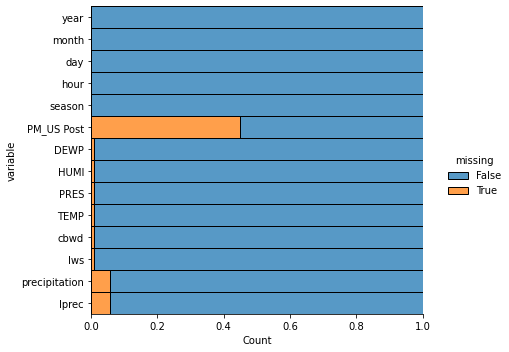

In [11]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)


Kako bi se pronašao pogodan način rešavanja problema nedostajućih vrednosti, biće izvršena analiza svake pojedinačne godine za koju su beležene vrednosti obeležja, a gde je vrednost PM_US Post = NULL.

In [12]:
df["year"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015])

In [13]:
df2010 = df.loc[df["year"] == 2010]
df2011 = df.loc[df["year"] == 2011]
df2012 = df.loc[df["year"] == 2012]
df2013 = df.loc[df["year"] == 2013]
df2014 = df.loc[df["year"] == 2014]
df2015 = df.loc[df["year"] == 2015]

In [14]:
for i in range(2010, 2016):
  globals()['df%sper' % i]=globals()['df%s' % i]['PM_US Post'].isnull().sum()/df2010.shape[0]*100

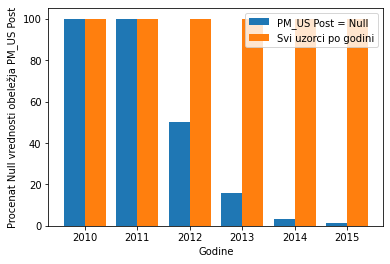

In [15]:
godine = ["2010", "2011", "2012", "2013", "2014", "2015"]
procenti = [df2010per, df2011per, df2012per, df2013per, df2014per, df2015per]
skup = [100, 100, 100, 100, 100, 100]

x = np.arange(len(godine))
plt.bar(x - 0.2, procenti, 0.4, label = "PM_US Post = Null")
plt.bar(x + 0.2, skup, 0.4, label = "Svi uzorci po godini")

plt.xticks(x, godine)
plt.xlabel("Godine")
plt.ylabel("Procenat Null vrednosti obeležja PM_US Post")
plt.legend()



Na osnovu grafikona gde su prikazane nedostajuće vrednosti za obeležje PM_US Post po godinama. 

Sa grafikona se mogu doneti sledeći zaključci za vrednosti podataka obeležja PM_US Post redom za dostupne godine:

a. 2010: podaci ne postoje - 100% Null vrednosti

b. 2011: podaci ne postoje - 100% Null vrednosti

c. 2012: postoji u proseku polovina podataka ~ 50%

d. 2013: postoji približno 70-80%, dakle ~20% Null vrednosti

e. 2014: postoji približno 90% podataka, dakle ~10% Null vrednosti

f. 2015: postoji približno 90% podataka, dakle ~10% Null vrednosti

Nakon uočavanja udela nedostajućih vrednosti datog obeležja po godinama, doneta je sledeća odluka: 

- Vrednosti obeležja vezane za godine koje imaju više od 10-15% Null vrednosti biće **izbačene**(godine: 2010, 2011, 2012, 2013).

- Vrednosti obeležja vezane za godine koje imaju manje od 10-15% Null vrednosti biće samo **korigovane**, to jest, biće izmenjene metodom prepisivanja poznatih vrednosti(godine: 2014, 2015).

In [16]:
df2014["PM_US Post"].fillna(method = "ffill", inplace = True)
df2015["PM_US Post"].fillna(method = "ffill", inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df[df['year']==2014]=df2014
df[df['year']==2015]=df2015

In [18]:
nan = df.isnull().sum().sort_values(ascending = False)
print("Nedostajući podaci po svakom od obeležja:\n", nan, "\n")

Nedostajući podaci po svakom od obeležja:
 PM_US Post       23288
precipitation     2955
Iprec             2955
HUMI               535
Iws                533
DEWP               529
TEMP               527
PRES               521
cbwd               521
year                 0
month                0
day                  0
hour                 0
season               0
dtype: int64 



In [19]:
df.dropna(axis = 0, how ='all', inplace = True, subset=['PM_US Post'])

In [20]:
df.head(10)

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
20750,2012,5,14,14,1,46.0,4.0,24.24,1013.9,26.0,cv,2.0,0.0,0.0
21263,2012,6,4,23,2,69.0,18.0,88.28,1008.1,20.0,cv,4.0,0.0,0.0
21279,2012,6,5,15,2,98.0,19.0,88.37,1004.1,21.0,cv,4.0,0.0,0.0
21280,2012,6,5,16,2,89.0,20.0,83.25,1003.1,23.0,cv,4.0,0.0,0.0
21281,2012,6,5,17,2,66.0,18.0,73.50,1003.1,23.0,NE,2.0,0.0,0.0
21282,2012,6,5,18,2,86.0,18.0,69.20,1003.1,24.0,NE,4.0,0.0,0.0
21283,2012,6,5,19,2,80.0,19.0,78.24,1004.1,23.0,NE,7.0,0.0,0.0
21284,2012,6,5,20,2,73.0,18.0,73.50,1004.1,23.0,NE,9.0,0.0,0.0
21285,2012,6,5,21,2,84.0,18.0,78.09,1005.1,22.0,NE,12.0,0.0,0.0
21286,2012,6,5,22,2,75.0,18.0,78.09,1006.1,22.0,cv,2.0,0.0,0.0


In [21]:
nan = df.isnull().sum().sort_values(ascending = False)
print("Nedostajući podaci po svakom od obeležja:\n", nan, "\n")

Nedostajući podaci po svakom od obeležja:
 precipitation    1224
Iprec            1224
Iws               498
HUMI              493
DEWP              490
TEMP              489
PRES              486
cbwd              486
year                0
month               0
day                 0
hour                0
season              0
PM_US Post          0
dtype: int64 



In [22]:
print("Dimenzije dataframe-a nakon brisanja datih vrednosti: ", df.shape)

Dimenzije dataframe-a nakon brisanja datih vrednosti:  (29296, 14)


Nakon što je rešen problem nedostajućih vrednosti za obeležje PM_US Post kojih je brojčano bilo najviše, sad će se sagledati nedostajuće vrednosti za ostala obeležja.

In [23]:
per = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
print("Nedostajući podaci procentualno iskazani: \n", per, "\n")

Nedostajući podaci procentualno iskazani: 
 precipitation    4.178045
Iprec            4.178045
Iws              1.699891
HUMI             1.682824
DEWP             1.672583
TEMP             1.669170
PRES             1.658930
cbwd             1.658930
year             0.000000
month            0.000000
day              0.000000
hour             0.000000
season           0.000000
PM_US Post       0.000000
dtype: float64 



Nakon prolaska kroz trenutni dataframe, može se uočiti da vrednosti određenih obeležja nedostaju u istim trenucima, te će one biti izbačene.

In [24]:
df.dropna(axis = 0, how = "all", inplace = True, subset = ["Iws","HUMI", "DEWP", "TEMP", "PRES", "cbwd"])

In [25]:
per = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
print("Nedostajući podaci procentualno iskazani: \n", per, "\n")

Nedostajući podaci procentualno iskazani: 
 precipitation    4.245054
Iprec            4.245054
Iws              0.041652
HUMI             0.024297
DEWP             0.013884
TEMP             0.010413
year             0.000000
month            0.000000
day              0.000000
hour             0.000000
season           0.000000
PM_US Post       0.000000
PRES             0.000000
cbwd             0.000000
dtype: float64 



Obeležja lws, HUMI, DEWP i TEMP i nakon prethodnog izbacivanja Null vrednosti imaju i dalje neke Null vrednosti, te treba sagledati način na koji će isti biti rešene.

Neka od mogućih rešenja su: uklanjanje datih vrednosti, dodela srednje vrednosti, prepisivanje prve fizički najbliže vrednosti iz dataframe-a.

Kako se data obeležja odnose redom na: kumulativnu brzinu vetra, vlažnost vazduha, temperaturu rose i temperaturu, najviše smisla ima primeniti metodu dodeljivanja vrednosti fizički najbliže vrednosti datog obeležja.

**Razlog izbora date metode:** metoda izbacivanja poslednja je razmatrana, sve ostale su imale prednost. Dakle, kako se analiziraju obeležja koja se odnose na vremenske uslove, nije imalo smisla dodeliti srednju vrednost/minimalnu vrednost/maksimalnu vrednost, jer se može desiti da kao srednju vrednost dobijemo neku koja bi "numerički gledano" bila adekvatna za zimske mesece, dok bi u ovom slučaju bila dodeljena na primer nekom danu u julu mesecu, čime bi bila napravljena još veća greška, u poređenju sa trenutnom Null vrednošću. Zbog toga, prednost je data metodi dopunjavanja to jest prepisivanja prve najbliže vrednosti, jer kako se podaci beleže po satima, usvaja se pretpostavka da se dati parametri ne mogu značajno promeniti u roku od 2 ili više sata.

In [26]:
df['Iws'].fillna(method = 'ffill', inplace = True)
df['HUMI'].fillna(method = 'ffill', inplace = True)
df['DEWP'].fillna(method = 'ffill', inplace = True)
df['TEMP'].fillna(method = 'ffill', inplace = True)

Kad je reč o obeležju precipitation, kod njega ima približno 4.245% Null vrednosti, te će se i za njega primeniti metod prepisivanja prve fizički najbliže vrednosti u dataframe-u.

In [27]:
df['precipitation'].fillna(method = 'ffill', inplace = True)

In [28]:
per = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
print("Nedostajući podaci procentualno iskazani: \n", per, "\n")

Nedostajući podaci procentualno iskazani: 
 Iprec            4.245054
year             0.000000
month            0.000000
day              0.000000
hour             0.000000
season           0.000000
PM_US Post       0.000000
DEWP             0.000000
HUMI             0.000000
PRES             0.000000
TEMP             0.000000
cbwd             0.000000
Iws              0.000000
precipitation    0.000000
dtype: float64 



Nakon predthodno preduzethi koraka, vidi se da su otklonjene Null vrednosti za sva obeležja, osim za obeležje Iprec, koje se odnosi na kumulativne padavine.

Kako se pojam "kumulativnih padavina" odnosi na ukupnu količinu padavina koja je pala u određenom vremenskom periodu, to jest ovde tokom jednog sata u danu, može se rezonovati da prethodno korišćen metod popunjavanja vrednosti prvom najbližom vrednošću za dato obeležje neće dati najbolje rezultate, jer "stanje" ovog obeležja može znatno da varira iz sata u sat, što nije bio slučaj kod prethodno promenjenih obeležja.

Zbog toga, gde god je Iprec jednaka nuli, tada se vrednost tog obeležja postavlja na nulu.


In [29]:
# Resetovanje indeksa u dataframe-u
df.reset_index(inplace=True, drop=False)

# Izdvajanje redova u kojima je vrednost obeležja Iprec null
null_rows = df[df["Iprec"].isnull()]

# Izdvajanje indeksa redova u kojima je vrednost obeležja Iprec null
null_indexes = null_rows.index
print(null_indexes)


Int64Index([  136,   137,   138,   139,   140,   141,   142,   143,   144,
              145,
            ...
            28565, 28566, 28567, 28568, 28576, 28577, 28578, 28579, 28634,
            28645],
           dtype='int64', length=1223)


In [30]:
# Iteriranje kroz sve indekse u nizu ind
for i in null_indexes:
    # Provera da li je padavina tog sata 0
    if df["precipitation"][i] == 0:
        # Resetovanje sume na 0
        retVal = 0
    else:
        # Sabiranje ukupne količine padavina sa padavinom tog sata
        retVal = df["precipitation"][i] + df["Iprec"][i-1]
    # Postavljanje vrednosti za obeležje Iprec
    df["Iprec"][i] = retVal

<ipython-input-30-925d578a1681>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Iprec"][i] = retVal


In [31]:
df.drop(['index'], inplace = True, axis = 1)

In [32]:
per = (df.isnull().sum()/len(df)*100).sort_values(ascending = False)
print("Nedostajući podaci procentualno iskazani: \n", per, "\n")

Nedostajući podaci procentualno iskazani: 
 year             0.0
month            0.0
day              0.0
hour             0.0
season           0.0
PM_US Post       0.0
DEWP             0.0
HUMI             0.0
PRES             0.0
TEMP             0.0
cbwd             0.0
Iws              0.0
precipitation    0.0
Iprec            0.0
dtype: float64 



Sve nedostajuće vrednosti su uspešno otklonjene.

7. Analizirati obeležja (statističke veličine, raspodela, …)


Na početku, biće sagledane deskriptivne statistike za obeležja sa numeričkim vrednostima.

In [33]:
df.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000,28810.000000
mean,2013.758903,7.001909,15.752135,11.516904,2.594898,83.630753,12.780805,72.764261,1014.523356,18.350989,4.297362,0.109504,1.841722
std,1.047342,3.430930,8.796074,6.929672,1.052495,57.161797,7.511577,18.179902,8.092296,7.757853,6.403516,1.002564,11.171547
min,2012.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-2.000000,0.000000,0.000000,0.000000
25%,2013.000000,4.000000,8.000000,6.000000,2.000000,44.000000,7.000000,60.740000,1008.000000,12.000000,1.000000,0.000000,0.000000
50%,2014.000000,7.000000,16.000000,12.000000,3.000000,69.000000,14.000000,76.350000,1014.900000,19.000000,2.000000,0.000000,0.000000
75%,2015.000000,10.000000,23.000000,18.000000,3.000000,105.000000,19.000000,87.750000,1021.000000,24.000000,5.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,93.000000,51.700000,169.400000


Obeležje **year**, koje se odnosi na godinu, ima korektne vrednosti, jer sagledavajući vrednosti za mean, min, max ne uočavaju se nepravilnosti, dok odnos medijane i srednje vrednosti ne ukazuje na postojanje autlajera.

Obeležje **month** takođe ima korektne vrednosti: mean ~= 50% te nema autlajera, min i max su takođe korektni i očekivani, dakle krećem od prvog(1) meseca, završavam sa dvanaestim(12).

Isto važi i za obeležje **day**, mean ~= 50%, min = 1, tada max mora biti = 31.

Ista situacija je i kod obeležja **hour**, koje ovde počinje od tzv. nultog sata i ide sve do 23.

Vrednosti obeležja **season** takođe su korektna:
mean ~= 50%, min = 1, max = 4(4 moguća godišnja doba).



Kod obeležja **PM_US Post**, uočavamo veliku razliku između mean i 50%, te se pretpostavlja prisustvo autlajera.

Takođe, može se uočiti velika razlika između max i medijane, te postoje dodatni problemi poput nejednake distribuiranosti ili pak pogrešnog unosa vrednosti, što će biti provereno u nastavku.

In [34]:
# Count the number of rows where the value in the 'PM_US Post' column is greater than 350
potencijalniAutlajeri = df[df['PM_US Post'] > 350]['PM_US Post'].count()

# Calculate the percentage of rows with a value greater than 350 in the 'PM_US Post' column
percentage = potencijalniAutlajeri / len(df) * 100

# Print the results
print("Percentage: {:.2f}".format(percentage))
print("Number:", potencijalniAutlajeri)
print(df[df['PM_US Post'] > 350]['PM_US Post'])


Percentage: 0.17
Number: 49
4634     355.0
4659     409.0
4660     387.0
4661     371.0
4673     351.0
4675     354.0
4715     368.0
4717     368.0
4727     374.0
4728     389.0
4775     352.0
4776     378.0
4777     375.0
5208     383.0
5209     362.0
5228     359.0
5231     374.0
5336     487.0
5337     388.0
9786     401.0
9787     403.0
9788     436.0
9789     428.0
9790     352.0
12016    382.0
12017    359.0
12018    356.0
12019    688.0
12020    685.0
12021    549.0
12022    386.0
12023    365.0
12025    491.0
12026    427.0
12027    420.0
12028    382.0
12029    379.0
12030    433.0
12031    449.0
12032    425.0
12033    416.0
12034    395.0
12035    364.0
28756    362.0
28757    371.0
28758    363.0
28773    394.0
28774    399.0
28775    399.0
Name: PM_US Post, dtype: float64


Nakon izlistanih podataka za potencijalne autlajere, vidi se da su najveće vrednosti za dato obeležje kod uzoraka koji su fizički blizu u dataframe-u, te će se pretpostaviti da vrednosti nisu pogrešno unete već da su stvarne, dok je na licima koja obavljaju unos podataka da potvrde datu pretpostavku. U daljoj analizi, ove vrednosti neće biti korigovane niti izbačene, već će biti ostavljene u izvornom obliku.

Dalje, kod obeležja **DEWP** takođe se uočava razlika između mean i 50%, no u takvom odnosu da će se sada više autlajera nalaziti sa leve strane(zamišljene krive), te će se smanjiti vrednost srednje vrednosti.



Nakon toga, kod obeležja **HUMI, PRES, TEMP** ne uviđaju se neke drastične vrednosti koje bi ukazivale na neregularnost.

Za obeležje **Iws**, koje se odnosi na kumulativnu brzinu vetra, uočava se velika razlika u odnosu na max i ostale vrednosti, no, u ovoj situaciji će se zanemariti zbog smisla obeležja.

Kod obeležja **precipitation**, na osnovu deskriptivnih statistika, uočava se postojanje autlajera, koji će dalje biti izlistani.

In [35]:
potencijalniAutlajeri = df[df["precipitation"] > 20]["precipitation"].count()
percentage = potencijalniAutlajeri / len(df) * 100
print("Percentage: {:.2f}".format(percentage))
print("Number:", potencijalniAutlajeri)
print(df[df["precipitation"] > 20]["precipitation"])

Percentage: 0.07
Number: 19
887      34.8
7188     44.2
7209     21.0
7557     22.9
7583     20.5
7584     22.1
7587     26.5
7903     25.2
8140     20.7
8218     51.7
9233     29.3
9234     32.7
16363    27.8
16364    40.1
16457    20.3
16458    31.8
16834    26.1
22926    26.3
25036    29.8
Name: precipitation, dtype: float64


Nakon analize deskriptivnih statistika, odlučeno je da se sva obeležja, zajedno sa vrednostima istih, zadrže u izvornoj formi.

Dodatno, pre nego što se krene sa analizom vrednosti obeležja PM_US Post, biće izvršena "korekcija" vrednosti obeležja cbwd, koje se odnosi na vrednost obeležja.

In [36]:
df["cbwd"].unique()

array(['cv', 'NE', 'SW', 'NW', 'SE'], dtype=object)

Kako je cbwd trenutno kategoričko obeležje, biće pretvoreno u numeričko obeležje radi bolje dalje analize na sledeći način: možemo koristiti "dummies" pristup ili nešto logičnije. Kako se prema određenoj strani sveta možemo orijentisati putem kompasa, koji je u obliku kruga, vrednostima koje cbwd trenutno ima pridružićemo nove vrednosti koje će se odnositi na to za koliko stepeni smo se pomerili od određene tačke na krugu. 

Smer kretanja biće pozitivan ili negativan, dok će podrazumevano kretanje biti kretanje suportno od kazaljke na satu.


In [37]:
df["cbwd"] = df["cbwd"].replace("cv", 00)
df["cbwd"] = df["cbwd"].replace("NE", 45)
df["cbwd"] = df["cbwd"].replace("SW", -135)
df["cbwd"] = df["cbwd"].replace("NW", -45)
df["cbwd"] = df["cbwd"].replace("SE", 135)

In [38]:
df.head(20)

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,46.0,4.0,24.24,1013.9,26.0,0,2.0,0.0,0.0
1,2012,6,4,23,2,69.0,18.0,88.28,1008.1,20.0,0,4.0,0.0,0.0
2,2012,6,5,15,2,98.0,19.0,88.37,1004.1,21.0,0,4.0,0.0,0.0
3,2012,6,5,16,2,89.0,20.0,83.25,1003.1,23.0,0,4.0,0.0,0.0
4,2012,6,5,17,2,66.0,18.0,73.50,1003.1,23.0,45,2.0,0.0,0.0
5,2012,6,5,18,2,86.0,18.0,69.20,1003.1,24.0,45,4.0,0.0,0.0
6,2012,6,5,19,2,80.0,19.0,78.24,1004.1,23.0,45,7.0,0.0,0.0
7,2012,6,5,20,2,73.0,18.0,73.50,1004.1,23.0,45,9.0,0.0,0.0
8,2012,6,5,21,2,84.0,18.0,78.09,1005.1,22.0,45,12.0,0.0,0.0
9,2012,6,5,22,2,75.0,18.0,78.09,1006.1,22.0,0,2.0,0.0,0.0


In [39]:
columns = ['PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation']

for column in columns:
    kurtosis = df[column].kurtosis(axis=0)
    print("Kurtosis {}: {}".format(column, kurtosis))


Kurtosis PM_US Post: 4.436070551066427
Kurtosis DEWP: -0.804504164867593
Kurtosis HUMI: -0.3659852807541615
Kurtosis PRES: -0.7656967571305637
Kurtosis TEMP: -0.862257231407269
Kurtosis Iws: 32.23243385970626
Kurtosis precipitation: 806.7900792594611


In [40]:
columns = ['PM_US Post', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation']

for column in columns:
    kurtosis = df[column].skew(axis=0)
    print("Skewness {}: {}".format(column, kurtosis))

Skewness PM_US Post: 1.7308647478973462
Skewness DEWP: -0.35195927620485584
Skewness HUMI: -0.622729784213956
Skewness PRES: 0.08507911537357757
Skewness TEMP: -0.15739413039412434
Skewness Iws: 4.5712189085625035
Skewness precipitation: 24.29042770157115


8. Analizirati detaljno vrednosti obeležja PM2.5 (’PM_US Post’).


In [41]:
print("Deskriptivna statistika:\n", df["PM_US Post"].describe())

Deskriptivna statistika:
 count    28810.000000
mean        83.630753
std         57.161797
min          1.000000
25%         44.000000
50%         69.000000
75%        105.000000
max        688.000000
Name: PM_US Post, dtype: float64


In [42]:
print("Kurtosis:", df["PM_US Post"].kurtosis(axis = 0))

Kurtosis: 4.436070551066427


In [43]:
print("Skewness: ", df["PM_US Post"]. skew(axis = 0))

Skewness:  1.7308647478973462


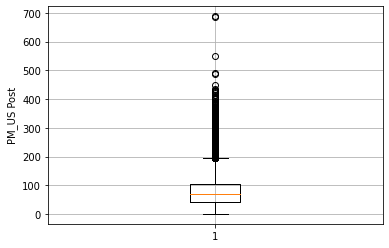

In [44]:
plt.boxplot([df["PM_US Post"]]) 
plt.ylabel("PM_US Post")
plt.grid()

Na osnovu boxplot-a, uočava se sledeće:
- Narandžasta linija ukazuje na medijanu, koja je oko 80.

- Pravougaonik ukazuje na interkvartilni opseg, između 25% i 75%, gde se nalazi 50% uzoraka, tj. oni se nalaze na intervalu od približno 50ug/m3 do 100ug/m3.

- Kružići/tačkice ukazuju na autlajere, gde se može videti da ovde postoji veći broj autlajera, od kojih pojedini imaju veoma velike vrednosti(poput onog maksimuma od 688 ug/m3).

Kod nižih vrednosti nema autlajera.

# Analiza obeležja PM_US Post po godinama

In [45]:
df["year"].unique()

array([2012, 2013, 2014, 2015])

In [46]:
df2012 = df.loc[df["year"] == 2012]
df2013 = df.loc[df["year"] == 2013]
df2014 = df.loc[df["year"] == 2014]
df2015 = df.loc[df["year"] == 2015]

Text(0.5, 0.98, 'Koncentracija PM2.5 po godinama')

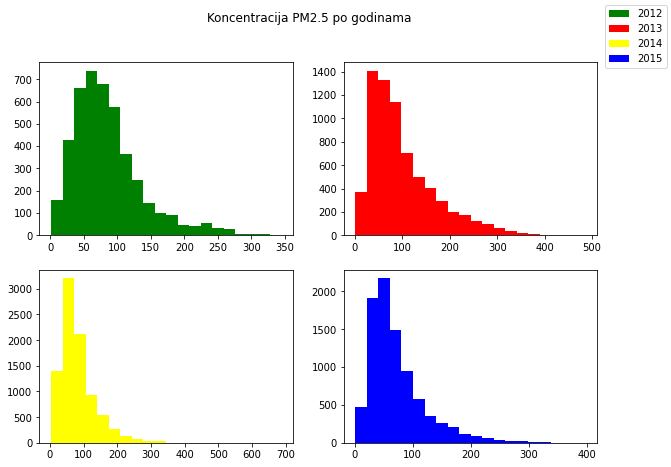

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[10,7])
fig.subplots_adjust(hspace=0.2, wspace=0.2)

hist_2012 = ax[0,0].hist(df2012["PM_US Post"], color = "green", label = "2012", bins = 20)
hist_2013 = ax[0,1].hist(df2013["PM_US Post"], color = "red", label = "2013", bins = 20)
hist_2014 = ax[1,0].hist(df2014["PM_US Post"], color = "yellow", label = "2014", bins = 20)
hist_2015 = ax[1,1].hist(df2015["PM_US Post"], color = "blue", label = "2015", bins = 20)

fig.legend()
fig.suptitle("Koncentracija PM2.5 po godinama")

In [48]:
df

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,46.0,4.0,24.24,1013.9,26.0,0,2.0,0.0,0.0
1,2012,6,4,23,2,69.0,18.0,88.28,1008.1,20.0,0,4.0,0.0,0.0
2,2012,6,5,15,2,98.0,19.0,88.37,1004.1,21.0,0,4.0,0.0,0.0
3,2012,6,5,16,2,89.0,20.0,83.25,1003.1,23.0,0,4.0,0.0,0.0
4,2012,6,5,17,2,66.0,18.0,73.50,1003.1,23.0,45,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,2015,12,31,19,4,262.0,7.0,87.28,1027.0,9.0,-45,2.0,0.0,0.0
28806,2015,12,31,20,4,218.0,7.0,87.28,1028.0,9.0,-45,4.0,0.0,0.0
28807,2015,12,31,21,4,213.0,7.0,87.28,1028.0,9.0,0,1.0,0.0,0.0
28808,2015,12,31,22,4,236.0,7.0,93.40,1028.0,8.0,-45,2.0,0.0,0.0


Rapodela koncentracije PM2.5 je tokom svih dostupnih godina *relativno ista i desno asimetrična.*

# Analiza obeležja PM_US Post po mesecima

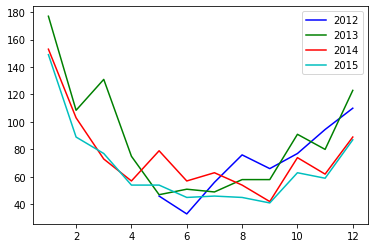

In [49]:
mean12= df2012[["month", "PM_US Post"]].groupby("month").median()
mean13= df2013[["month", "PM_US Post"]].groupby("month").median()
mean14= df2014[["month", "PM_US Post"]].groupby("month").median()
mean15= df2015[["month", "PM_US Post"]].groupby("month").median()

data_frames = [mean12, mean13, mean14, mean15]
colors = ['b', 'g', 'r', 'c']
labels = ['2012', '2013', '2014', '2015']

for dfs, color, label in zip(data_frames, colors, labels):
    plt.plot(dfs.index, dfs["PM_US Post"], color, label = label)
   
plt.legend()

Na osnovu grafika, moguće je doneti sledeće zaključke:

- Tokom svih dostupnih godina, posmatrajući specifične mesece, za iste se beleže relativno slične vrednosti.

- Odstupanje u smislu veće vrednosti javlja se u periodu marta 2013. godine.

- Vrednosti PM2.5 su najniže tokom aprila, maja, juna i jula.

- Vrednosti PM2.5 su najviše tokom januara i decembra.

Kako se uočava razlika u vrednosti koncentracije PM2.5 po specifičnim periodima godine, sledi analiza PM2.5 po sezonama, odnosno, godišnjim dobima.

In [50]:
df

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2012,5,14,14,1,46.0,4.0,24.24,1013.9,26.0,0,2.0,0.0,0.0
1,2012,6,4,23,2,69.0,18.0,88.28,1008.1,20.0,0,4.0,0.0,0.0
2,2012,6,5,15,2,98.0,19.0,88.37,1004.1,21.0,0,4.0,0.0,0.0
3,2012,6,5,16,2,89.0,20.0,83.25,1003.1,23.0,0,4.0,0.0,0.0
4,2012,6,5,17,2,66.0,18.0,73.50,1003.1,23.0,45,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28805,2015,12,31,19,4,262.0,7.0,87.28,1027.0,9.0,-45,2.0,0.0,0.0
28806,2015,12,31,20,4,218.0,7.0,87.28,1028.0,9.0,-45,4.0,0.0,0.0
28807,2015,12,31,21,4,213.0,7.0,87.28,1028.0,9.0,0,1.0,0.0,0.0
28808,2015,12,31,22,4,236.0,7.0,93.40,1028.0,8.0,-45,2.0,0.0,0.0


# Analiza obeležja PM_US Post po sezonama(godišnjim dobima)

In [51]:
df_spr = df[df["season"] == 1]
df_sum = df[df["season"] == 2]
df_aut = df[df["season"] == 3]
df_win = df[df["season"] == 4]

In [52]:
print("Deskripitvna statistika - SPRING:\n", df_spr["PM_US Post"].describe())
print("\n")
print("Deskripitvna statistika - SUMMER:\n", df_sum["PM_US Post"].describe())
print("\n")
print("Deskripitvna statistika - AUTUMN:\n", df_aut["PM_US Post"].describe())
print("\n")
print("Deskripitvna statistika - WINTER:\n", df_win["PM_US Post"].describe())

Deskripitvna statistika - SPRING:
 count    5354.000000
mean       78.171461
std        47.173679
min         4.000000
25%        45.000000
50%        68.000000
75%        99.000000
max       349.000000
Name: PM_US Post, dtype: float64


Deskripitvna statistika - SUMMER:
 count    8094.000000
mean       56.735977
std        28.993066
min         1.000000
25%        36.000000
50%        52.000000
75%        75.000000
max       310.000000
Name: PM_US Post, dtype: float64


Deskripitvna statistika - AUTUMN:
 count    8231.000000
mean       75.518771
std        47.717428
min         1.000000
25%        42.000000
50%        64.000000
75%        96.000000
max       436.000000
Name: PM_US Post, dtype: float64


Deskripitvna statistika - WINTER:
 count    7131.000000
mean      127.619689
std        71.375444
min         8.000000
25%        74.000000
50%       114.000000
75%       168.000000
max       688.000000
Name: PM_US Post, dtype: float64


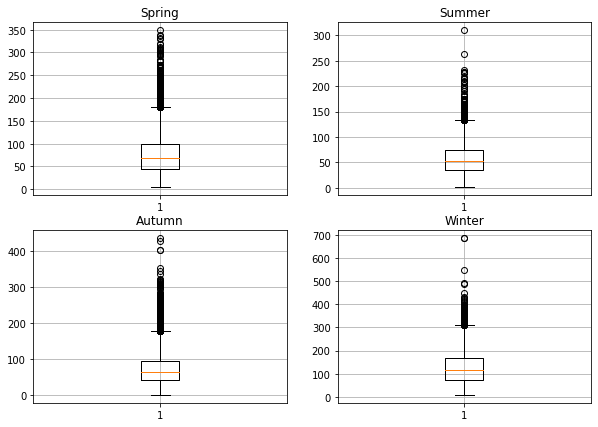

In [53]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = [10,7])
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

dfs = [df_spr, df_sum, df_aut, df_win]
titles = ['Spring', 'Summer', 'Autumn', 'Winter']

for i, subplot in enumerate(ax.flat):
    subplot.boxplot(dfs[i]['PM_US Post'])
    subplot.set_title(titles[i])
    subplot.grid()


Na osnovu prethodno dobijenih vrednosti PM2.5 na mesečnom nivou i sad na osnovu sezona, vidi se da su vrednosti PM2.5 najmanje tokom leta, to jest, zagađenje vazduha je tada najmanje i kreće se na intervalu od 36ug/m3 do 75ug/m3.

Najveće vrednosti PM2.5 su tokom zime, gde se vrednosti kreću na intervalu od 74ug/m3 do 168ug/m3. Ovakav rezultat je logičan i očekivan zbog više faktora:

1. Tokom zimskih meseci, ljudi imaju tendenciju da koriste grejanje u svojim domovima, što dovodi po povećane upotrebe uglja, drveta i drugih fosilnih goriva. Sagorevanjem ovih goriva oslobađaju se čestice u vazduh, uključujući i PM2.5.

2. Smanjeno je mešanje vazduha, odnosno, hladan vazduh gušći je od toplog, te tako ima tendenciju da ostane blizu tla. Ovo dovodi do temperaturne inverzije, gde sloj hladnog vazduha zadržava zagađivače blizu površine, što ima za posledicu nakupljanje PM2.5 čestica, posebno u oblastima gde je visok nivo saobraćaja i gde postoji mnogo industrija.

3. Smanjena je sunčeva svetlost, tokom zime dani su kraći, što može dovesti do smanjenja količine fotohemijskih reakcija koje se dešavaju u atmosferi. Ove reakcije mogu pomoći da se razbiju zagađivači poput PM2.5, te smanjenje sunčeve svetlosti može dovesti do povećane koncentracije PM2.5.

9. Vizuelizovati i iskomentarisati zavisnost promene PM2.5 od preostalih obeležja u bazi.

<AxesSubplot:>

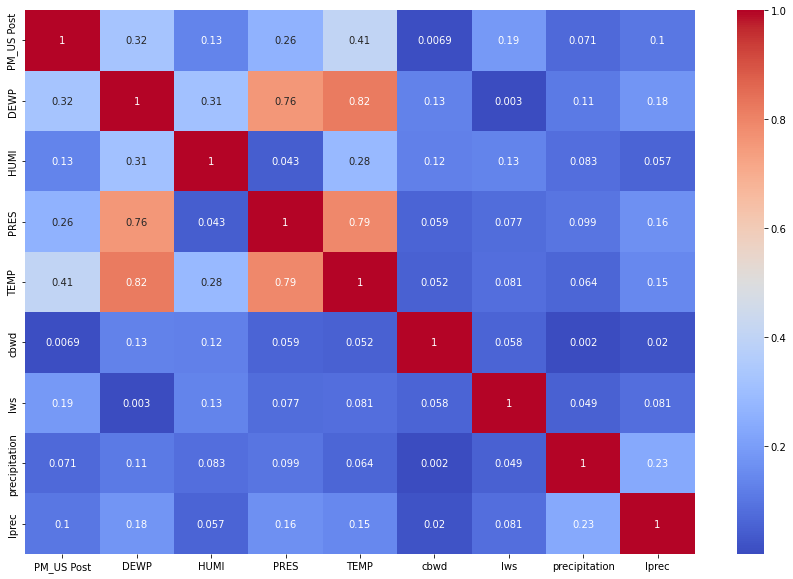

In [54]:
correlation_matrix = df[['PM_US Post','DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec']].corr()
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(correlation_matrix.abs(), annot = True, ax = ax, cmap='coolwarm')


Na osnovu dobijene matrice korelacije, može se uočiti da je je stepen korelacije obeležja PM_US Post najveći sa obeležjem TEMP, nakon kog redom slede obeležja DEWP, PRES, Iws, HUMI, Iprec, precipitation i cbwd.

Sa druge strane, obeležje koje je najmenje korelisano sa PM_US Post je precipitation.

Za svako od navedenih obeležja, biće dat grafički prikaz odnosa PM_US Post i datog obeležja.

Text(0.5, 1.0, 'Prosečna temperatura po godišnjim dobima')

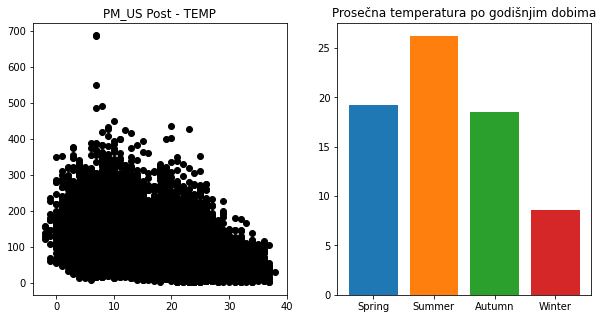

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = [10,5])
fig.subplots_adjust(hspace = 0.2, wspace = 0.2)

scatter_plot = ax[0].scatter(df['TEMP'], df['PM_US Post'], color='black', label='PM2.5-TEMP')
ax[0].set_title('PM_US Post - TEMP')
bar_plot = ax[1]
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
temps = [df_spr['TEMP'].mean(), df_sum['TEMP'].mean(), df_aut['TEMP'].mean(), df_win['TEMP'].mean()]

# Loop through data and plot each bar
for i in range(len(seasons)):
    bar_plot.bar(seasons[i], temps[i])

ax[1].set_title('Prosečna temperatura po godišnjim dobima')

Kako je vrednost korelacije između PM2.5 i TEMP jedanaka 0.41, to govori da je reč o srednje jakoj korelaciji između obeležja, što ukazuje na to da kad se vrednost jednog obeležja poveća, biće uvećana i vrednost drugog obeležja.

Na osnovu prikazanih grafikona, može se uočiti sledeće: maksimalna vrednost zastupljenosti PM2.5 uočava se u situaciji kad su temperature između 0 i 10 stepeni, što je dobijeno kao prosečna temperatura u zimskom periodu.

Dakle, prema grafikonima, kada vrednost obeležja PM2.5 raste - vrednost TEMP opada, što ukazuje na to da su ova dva obeležja negativno korelisana.


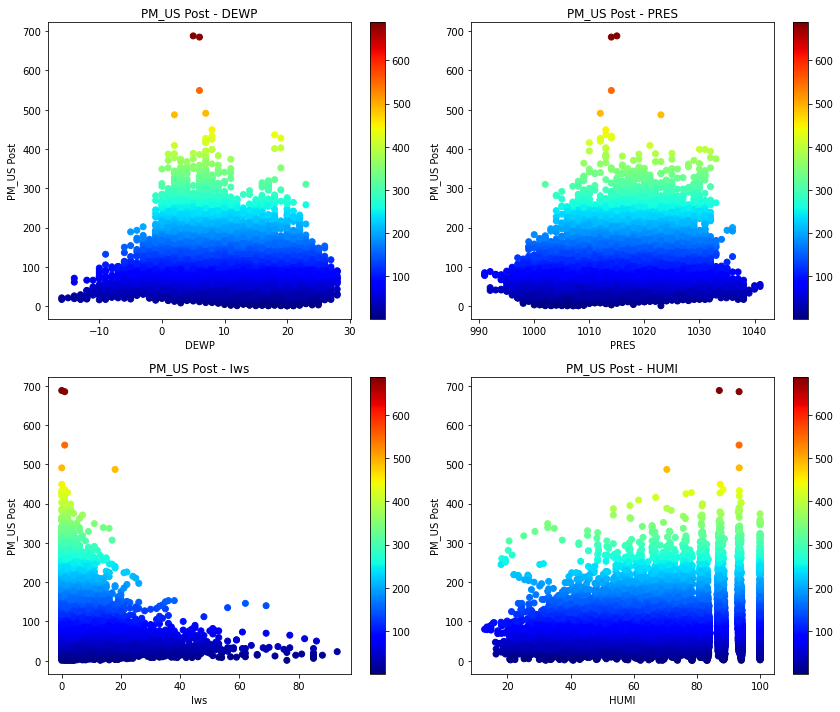

In [56]:
plt.figure(figsize=(12, 10))
cmap = plt.get_cmap('jet')
n_plots = 4
x_vars = ['DEWP', 'PRES', 'Iws', 'HUMI']
y_var = 'PM_US Post'
titles = ['PM_US Post - DEWP', 'PM_US Post - PRES', 'PM_US Post - Iws', 'PM_US Post - HUMI']

for i in range(n_plots):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[x_vars[i]], df[y_var], c=df[y_var], cmap=cmap)
    plt.colorbar()
    plt.title(titles[i])
    plt.xlabel(x_vars[i])
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()


Na osnovu datih grafikona, može se zaključiti sledeće:

PM_US Post - DEWP:

Korelacija = 0.41 - srednja korelacija

Kad se poredi koncentracija čestica PM2.5 sa temperaturom rose, uočava se da je koncentracija čestica bila manja kada je temperatura rose imala vrednost sličnu medijani.


PM_US Post - PRES:

Korelacija = 0.26 - srednja korelacija

Kad se poredi koncentracija čestica PM2.5 sa vazdušnim pritiskom, uočava se da je koncentracija čestica bila manja kada je vazdušni pritisak imao vrednost sličnu medijani.

PM_US Post - Iws:

Korelacija = 0.19 - slaba korelacija

Kada se poredi koncentracija čestica PM2.5 sa kumulativnom brzinom vetra, može se uočiti da je za niže vrednosti brzine vetra, koncentracija čestica bila manja.

PM_US Post - HUMI:

Korelacija = 0.13 - slaba korelacija

Kad se poredi koncentracija čestica PM2.5 sa vlažnošću vazduha, uočava se da koncentracija raste sa porastom vlažnosti vazduha.



10. Analizirati međusobne korelacije obeležja.


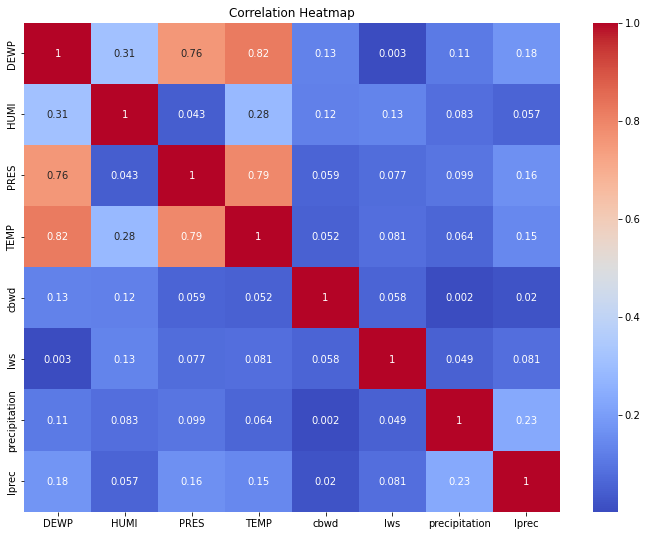

In [57]:
corr = df[['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec']].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr.abs(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Na osnovu prikazane matrice korelacije, uočava se da su parovi obeležja koji su najviše korelisani redom:

- DEWP i TEMP

- PRES i TEMP

- PRES I DEWP

Za date parove biće detaljnije ispitana korelisanost.

<Figure size 864x648 with 0 Axes>

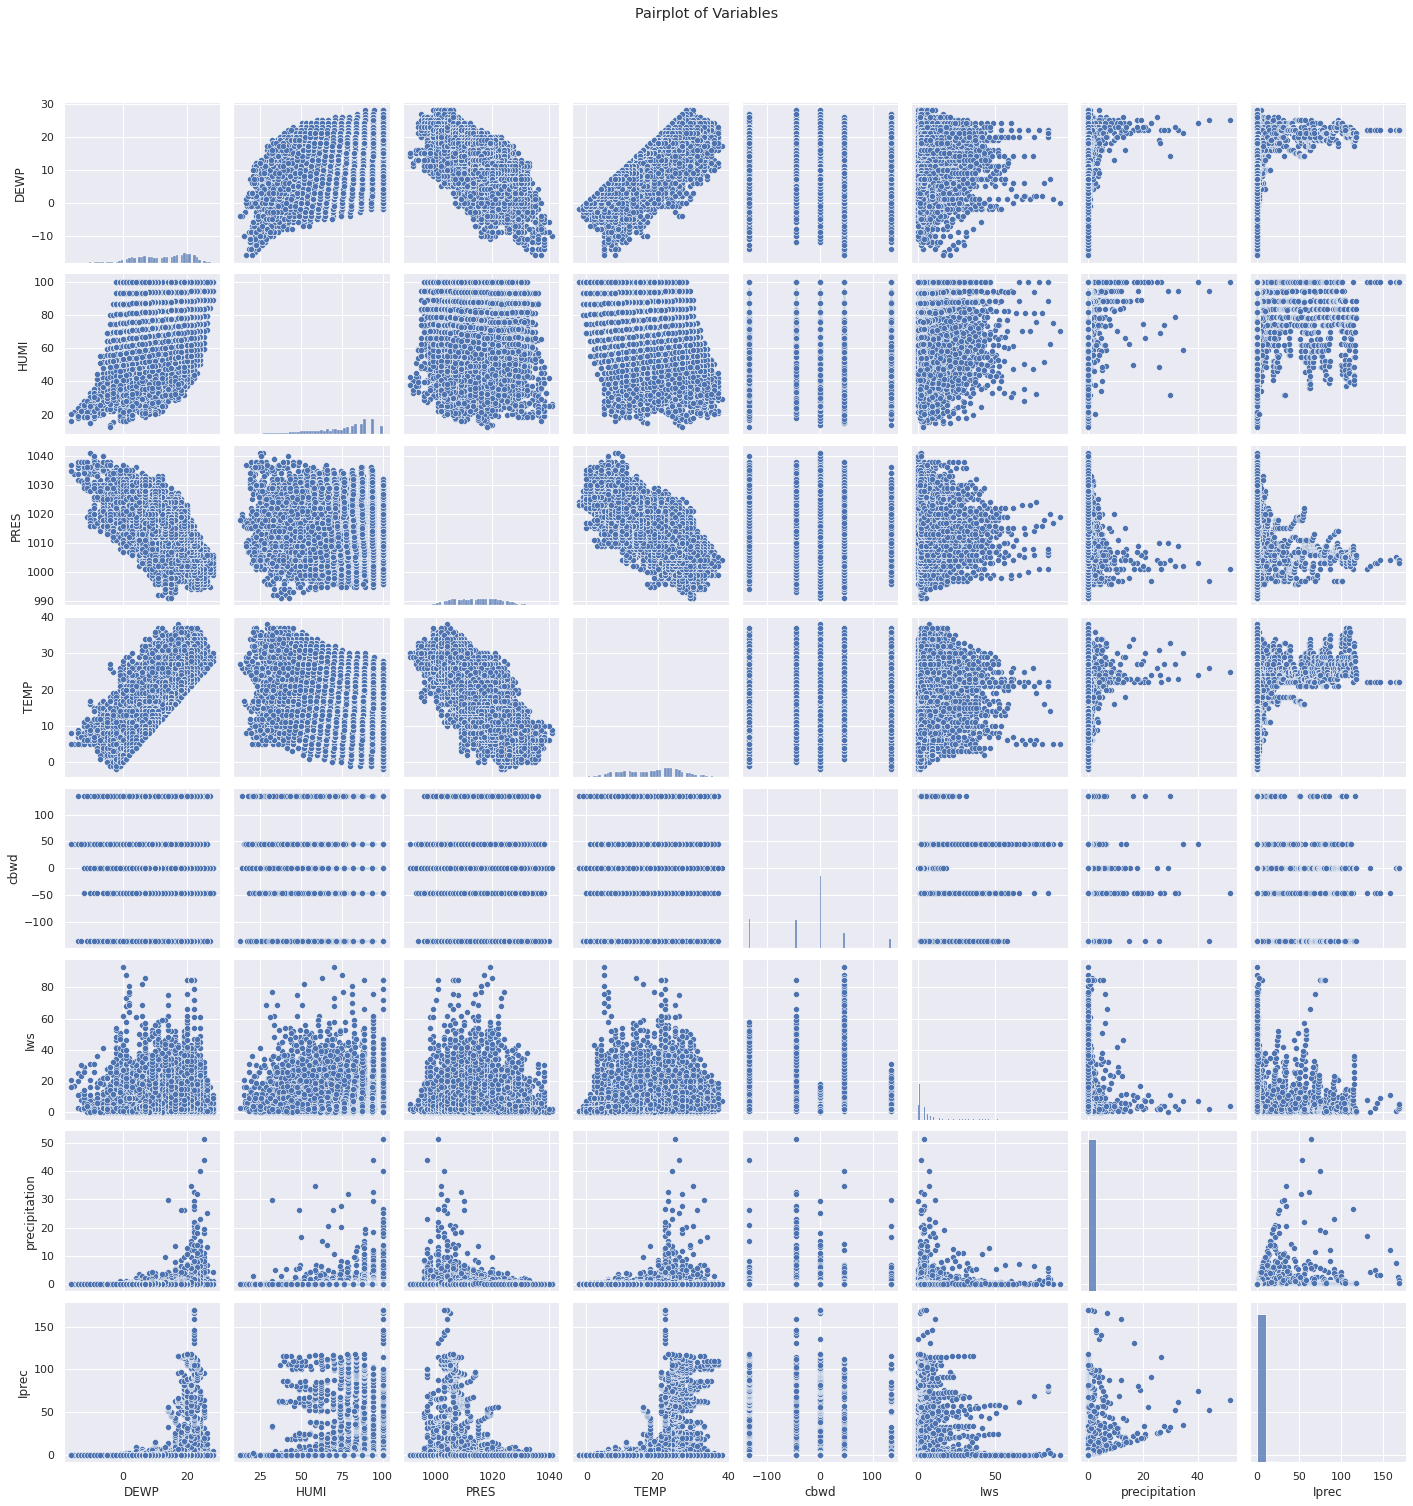

In [58]:
sns.set()
plt.figure(figsize = (12, 9))
sns.pairplot(df[['DEWP', 'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec']], height = 2.5)
plt.suptitle('Pairplot of Variables', y = 1.05)
plt.show()


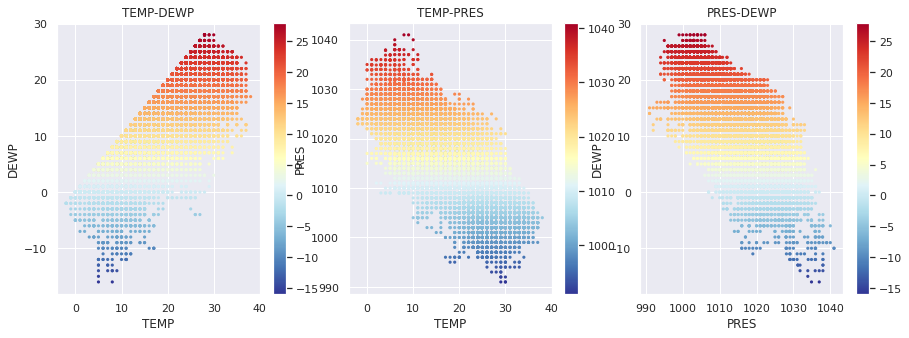

In [59]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(hspace=0.2, wspace=0.15)
x_vars = ['TEMP', 'TEMP', 'PRES']
y_vars = ['DEWP', 'PRES', 'DEWP']
colors = ['magenta', 'black', 'blue']
titles = ['TEMP-DEWP', 'TEMP-PRES', 'PRES-DEWP']
cmap = plt.get_cmap('RdYlBu_r')

marker_size = 10

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(df[x_vars[i]], df[y_vars[i]], c=df[y_vars[i]], cmap=cmap, s=marker_size, edgecolor='none')
    plt.title(titles[i])
    plt.xlabel(x_vars[i])
    plt.ylabel(y_vars[i])
    plt.colorbar()
plt.show()


TEMP - DEWP:

Na osnovu grafikona, uočava se da su obeležja TEMP i DEWP pozitivno korelisana, to jest, kako raste vrednost jednog obeležja, tako raste i vrednost drugog obeležja.

TEMP - PRES:

Na osnovu grafikona, uočava se da su obeležja TEMP i PRES negativno korelisana, to jest, da važi sledeće: kada su niske vrednosti TEMP, niske su i vrednosti za PRES.

PRES - DEWP:

Na osnovu grafikona, može se zaključiti da su i obeležja PRES i DEWP takođe negativno korelisana - niske vrednosti jednog obeležja ukazuju na niske vrednosti drugog obeležja.


Dodatno zapažžanje je to da obeležje koje se odnosi na padavine na sat imaju najmanju korelaciju ne samo sa obeležjem PM_US Post, već i sa svim ostalim obeležjima.

    year  month  day  hour  season  PM_US Post  DEWP   HUMI    PRES  TEMP  \
14  2012      6    6     3       2        76.0  19.0  88.37  1006.1  21.0   
15  2012      6    6     4       2        74.0  19.0  88.37  1006.1  21.0   
16  2012      6    6     5       2        69.0  19.0  93.98  1005.1  20.0   
34  2012      6    6    23       2         3.0  19.0  88.37  1007.1  21.0   
35  2012      6    7     0       2       117.0  19.0  88.37  1007.1  21.0   

    cbwd  Iws  precipitation  Iprec  
14     0  0.0            0.5    0.5  
15     0  0.0            0.7    1.2  
16     0  0.0            0.1    1.3  
34     0  1.0            0.2    0.2  
35     0  2.0            0.8    1.0  


   year  month  day  hour  season  PM_US Post  DEWP   HUMI    PRES  TEMP  \
0  2012      5   14    14       1        46.0   4.0  24.24  1013.9  26.0   
1  2012      6    4    23       2        69.0  18.0  88.28  1008.1  20.0   
2  2012      6    5    15       2        98.0  19.0  88.37  1004.1  21.0   
3  

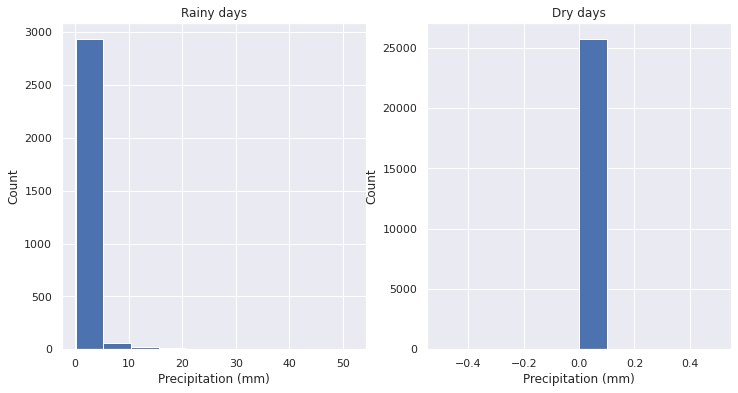

In [60]:
df_rain = df[df['precipitation'] != 0]
df_dry = df[df['precipitation'] == 0]

print(df_rain.head())
print("\n")
print(df_dry.head())

print("\nRainy days:")
print(df_rain.describe())
print("\nDry days:")
print(df_dry.describe())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_rain['precipitation'])
plt.title('Rainy days')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
plt.hist(df_dry['precipitation'])
plt.title('Dry days')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Count')
plt.show()


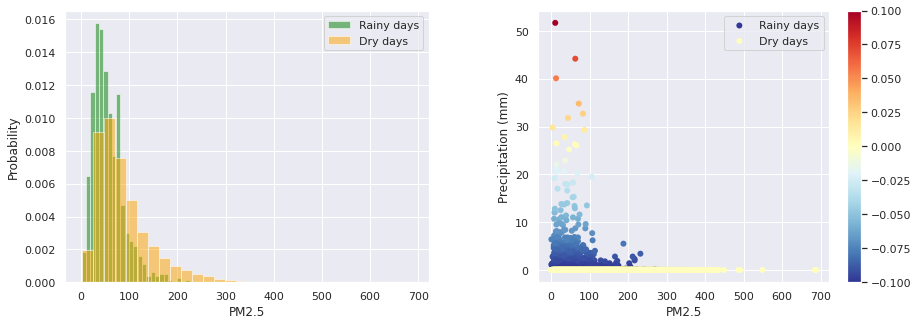

In [61]:
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)
bins = 30
alpha = 0.5
cmap = plt.get_cmap('RdYlBu_r')

plt.subplot(1, 2, 1)
plt.hist(df_rain['PM_US Post'], density=True, alpha=alpha, bins=bins, label='Rainy days', color='green')
plt.hist(df_dry['PM_US Post'], density=True, alpha=alpha, bins=bins, label='Dry days', color='orange')
plt.xlabel('PM2.5')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(df_rain['PM_US Post'], df_rain['precipitation'], c=df_rain['precipitation'], cmap=cmap, edgecolor='none')
plt.scatter(df_dry['PM_US Post'], df_dry['precipitation'], c=df_dry['precipitation'], cmap=cmap, edgecolor='none')
plt.xlabel('PM2.5')
plt.ylabel('Precipitation (mm)')
plt.colorbar()
plt.legend(['Rainy days', 'Dry days'])

plt.show()


Tokom kišnih dana, koncentracija PM2.5 je niža.

# **II DEO: LINEARNA REGRESIJA**

*Napraviti model linearne regresije koji predviđa koncengtraciju PM2.5 čestica.*

1. Potrebno je 15% nasumično izabranih uzoraka ostaviti kao test skup, 15% kao validacioni a 
preostalih 70% koristiti za obuku modela.


In [62]:
x=df.drop(['PM_US Post'], axis=1)
y=df['PM_US Post']

In [63]:
#Funkcija koja računa različite mere uspešnosti regresora
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) 
    mae = mean_absolute_error(y_test, y_predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [65]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (20167, 13)
y_train shape: (20167,)
x_val shape: (4321, 13)
y_val shape: (4321,)
x_test shape: (4322, 13)
y_test shape: (4322,)


**Standardizacija** je uobičajen korak pretprocesiranja koji se koristi za skaliranje obeležja nekog skupa podataka, kako bi ista imala slične opsege i distribucije.

**Normalizacijom obeležja** biće poboljšane performanse algoritma, kako bi algoritam mogao što bolje učiti na osnovu podataka.

*Srednja vrednost postavlja se na 0.*

*Standardna devijacija postavlja se na 1.*

In [66]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,-0.723750,-0.000593,-0.308940,1.085422,-0.563004,1.626562,1.180524,-1.541705,0.986117,-0.352706,-0.045072,-0.110708,-0.167716
1,-1.678227,0.582955,-1.558358,-1.663486,0.388723,0.825919,1.165630,0.047594,0.211826,-1.674708,1.527262,-0.110708,-0.167716
2,0.230727,-0.875915,-1.558358,-1.374128,-1.514731,-0.241605,0.512506,-0.309690,-0.562465,2.291296,-0.359539,-0.110708,-0.167716
3,1.185205,1.458276,-0.990441,-0.650731,1.340450,-0.375045,1.141910,1.415131,-0.949611,0.308294,-0.674006,-0.013110,-0.159048
4,-1.678227,1.166502,0.826894,-0.072013,0.388723,-2.376653,-2.245618,1.427451,-0.949611,-0.352706,-0.359539,-0.110708,-0.167716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20162,1.185205,-1.167689,-1.217607,0.072666,-1.514731,-1.309129,-0.120207,0.799124,-1.336757,0.969295,-0.045072,-0.110708,-0.167716
20163,-0.723750,-1.459463,-0.422523,-0.795410,1.340450,-1.576010,-0.639286,1.661534,-1.336757,-0.352706,-0.045072,-0.110708,-0.167716
20164,-1.678227,-0.000593,1.167645,-0.072013,-0.563004,1.359681,-0.567023,-1.036579,1.631360,-1.674708,0.269395,-0.110708,-0.167716
20165,0.230727,-0.000593,-0.990441,0.072666,-0.563004,1.226241,0.869959,-0.925697,0.728020,-0.352706,1.527262,0.084488,2.666492


2. Isprobati različite hipoteze, regularizaciju modela, selekciju obeležja (unapred ili unazad).

LR - osnovni oblik

Segmenti:

- inicijalizacija
- obuka
- testiranje
- evaluacija
- izračunavanje koeficijenata

Mean squared error:  2444.5188553878256
Mean absolute error:  36.28959409997259
Root mean squared error:  49.44207575929459
R2 score:  0.26758412035177404
R2 adjusted score:  0.2671116643186561
        y      y_pred
0   132.0  103.647335
1    72.0   97.270007
2    96.0   78.422173
3    67.0   83.632246
4    97.0   62.911930
5    19.0   93.949227
6    76.0   36.263553
7   213.0  144.494845
8    78.0   53.185884
9   125.0   76.849458
10   51.0   65.782992
11  152.0   67.061813
12  109.0  142.970597
13    9.0   41.393013
14   57.0   70.488032
15   26.0   64.388334
16   37.0   81.276461
17  200.0  159.170167
18   94.0   75.882281
19   59.0  104.571963


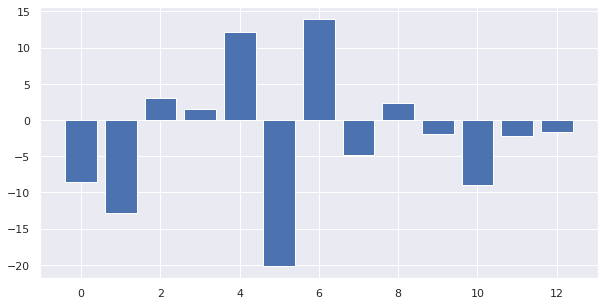

koeficijenti:  [ -8.52457911 -12.87993319   3.03794306   1.56085191  12.17989762
 -20.15141031  13.98273318  -4.79524804   2.35896812  -1.86550893
  -8.9229689   -2.14291838  -1.58520872]


In [67]:
# Osnovni oblik linearne regresije sa hipotezom y=b0+b1x1+b2x2+...+bnxn
# Inicijalizacija
first_regression_model = LinearRegression(fit_intercept=True)

# Obuka
first_regression_model.fit(x_train_std, y_train)

# Testiranje
y_predicted = first_regression_model.predict(x_test_std)

# Evaluacija
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
plt.show()
print("koeficijenti: ", first_regression_model.coef_)

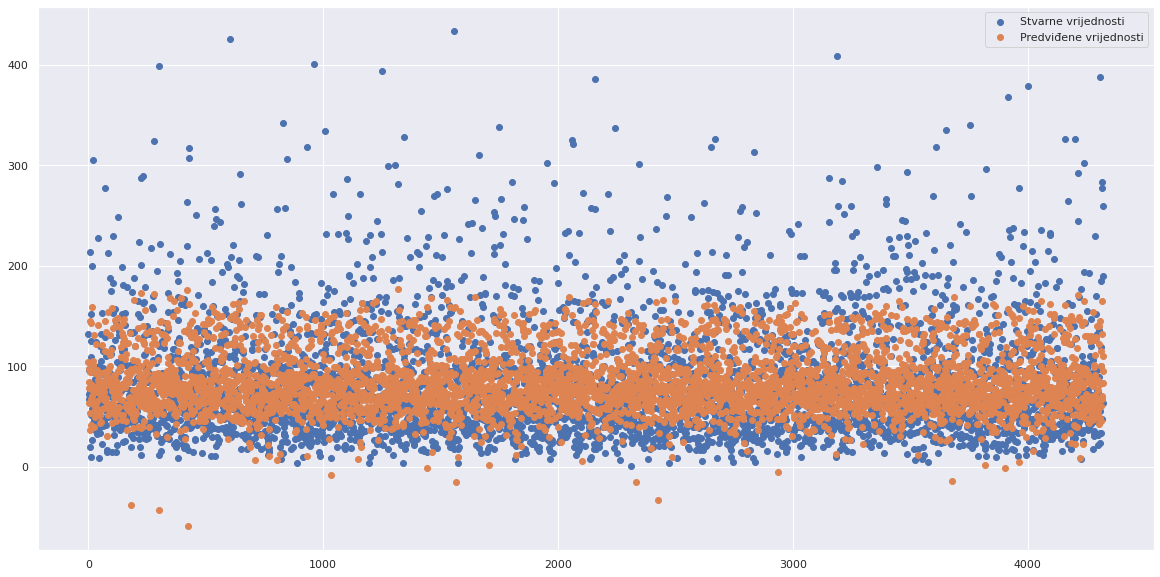

In [68]:
x0=range(0,len(y_test.values))
plt.figure(figsize=(20,10))
plt.scatter(x0,y_test.values,label="Stvarne vrijednosti")
plt.scatter(x0,y_predicted,label="Predviđene vrijednosti")
plt.legend()

In [69]:
import statsmodels.api as sm
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     577.5
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:07:21   Log-Likelihood:            -1.0705e+05
No. Observations:               20167   AIC:                         2.141e+05
Df Residuals:                   20153   BIC:                         2.142e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.703e+04    683.271     24.931      0.000    1.57e+04    1.84e+04
year             -8.1365      0.342    -23.772      0.000      -8.807      -7.466
month            -3.7580      0.121    -31.078      0.000      -3.995      -3.521
day               0.3451      0.039      8.812      0.000       0.268       0.422
hour              0.2258      0.055      4.089      0.000       0.118       0.334
season           11.5919      0.448     25.859      0.000      10.713      12.471
DEWP             -2.6890      0.423     -6.356      0.000      -3.518      -1.860
HUMI              0.7713      0.106      7.259      0.000       0.563       0.980
PRES             -0.5908      0.080     -7.380      0.000      -0.748      -0.434
TEMP              0.3044      0.413      0.737      0.461      -0.505       1.114
cbwd             -0.0274      0.005     -5.322      0.000      -0.037      -0.017
Iws              -1.4030      0.056    -25.072      0.000      -1.513      -1.293
precipitation    -2.0914      0.349     -5.995      0.000      -2.775      -1.408
Iprec            -0.1374      0.031     -4.379      0.000      -0.199      -0.076
==============================================================================
Omnibus:                     5776.750   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23993.800
Skew:                           1.363   Prob(JB):                         0.00
Kurtosis:                       7.596   Cond. No.                     4.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Polazna pretpostavka: izbaciti svako obeležje čija p-vrednost prelazi prag od 0.05.**

Kako je dobijena vrednost za  P>|t| iliti p-vrednost kod obeležja TEMP poprilično visoka i ukazuje na to da to obeležje nije statistički značajno u ovoj analizi, te je moguće odbaciti ga.



In [70]:
x.drop('TEMP',axis = 1,inplace = True)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [71]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)

In [72]:
X = sm.add_constant(x_train)

model = sm.OLS(y_train, X.astype('float')).fit()
model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PM_US Post   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     625.6
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:07:21   Log-Likelihood:            -1.0705e+05
No. Observations:               20167   AIC:                         2.141e+05
Df Residuals:                   20154   BIC:                         2.142e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.705e+04    682.816     24.975      0.000    1.57e+04    1.84e+04
year             -8.1377      0.342    -23.776      0.000      -8.809      -7.467
month            -3.7465      0.120    -31.247      0.000      -3.981      -3.511
day               0.3444      0.039      8.798      0.000       0.268       0.421
hour              0.2228      0.055      4.046      0.000       0.115       0.331
season           11.5590      0.446     25.915      0.000      10.685      12.433
DEWP             -2.3853      0.097    -24.647      0.000      -2.575      -2.196
HUMI              0.6953      0.025     27.270      0.000       0.645       0.745
PRES             -0.5993      0.079     -7.564      0.000      -0.755      -0.444
cbwd             -0.0273      0.005     -5.310      0.000      -0.037      -0.017
Iws              -1.4039      0.056    -25.095      0.000      -1.514      -1.294
precipitation    -2.0826      0.349     -5.973      0.000      -2.766      -1.399
Iprec            -0.1369      0.031     -4.365      0.000      -0.198      -0.075
==============================================================================
Omnibus:                     5785.473   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24074.115
Skew:                           1.364   Prob(JB):                         0.00
Kurtosis:                       7.605   Cond. No.                     4.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Nakon izbacivanja datih obeležja, sve p-vrednosti su manje od 0.05, odnosno, sve su jednake nuli, te sledi ponovono obučavanje za prvu hipotezu.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Mean squared error:  2444.458532399607
Mean absolute error:  36.28172376173986
Root mean squared error:  49.44146571856064
R2 score:  0.2676021940575185
R2 adjusted score:  0.26716611319658223
        y      y_pred
0   132.0  103.423172
1    72.0   96.859438
2    96.0   75.935319
3    67.0   83.477883
4    97.0   63.062969
5    19.0   93.830017
6    76.0   36.000314
7   213.0  144.323858
8    78.0   53.073777
9   125.0   76.931671
10   51.0   65.876766
11  152.0   67.171746
12  109.0  143.269125
13    9.0   41.570025
14   57.0   70.487882
15   26.0   64.491856
16   37.0   81.229695
17  200.0  159.032023
18   94.0   76.020339
19   59.0  104.652607
koeficijenti:  [ -8.52579849 -12.84034127   3.03222917   1.54002794  12.14524213
 -17.87542504  12.60372786  -4.86400083  -1.86103997  -8.92875253
  -2.13385714  -1.57983504]


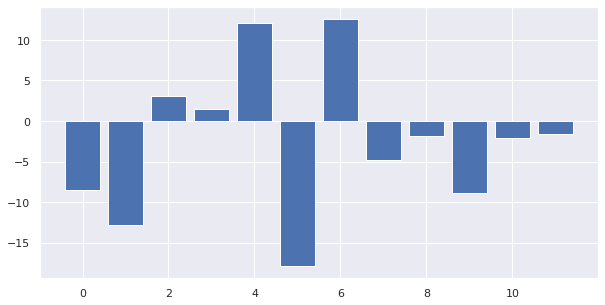

In [73]:
first_regression_model = LinearRegression(fit_intercept=True, normalize=False)
first_regression_model.fit(x_train_std, y_train)
y_predicted = first_regression_model.predict(x_test_std)
model_evaluation(y_test, y_predicted, x_train_std.shape[0], x_train_std.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(first_regression_model.coef_)),first_regression_model.coef_)
print("koeficijenti: ", first_regression_model.coef_)

Nakon selekcije obeležja, greška se nije smanjila.

Sledi izmena samog modela u cilju poboljšanja rezultata.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Mean squared error:  2188.131254727445
Mean absolute error:  34.38127041200969
Root mean squared error:  46.77746524478903
R2 score:  0.3444018342567783
R2 adjusted score:  0.34185620219146706
        y      y_pred
0   132.0  122.211252
1    72.0   96.875385
2    96.0   85.205945
3    67.0   58.529263
4    97.0   61.732531
5    19.0   83.802869
6    76.0   63.721167
7   213.0  163.024589
8    78.0   52.770055
9   125.0   78.094391
10   51.0   55.135466
11  152.0   55.138170
12  109.0  151.659241
13    9.0   55.234298
14   57.0   61.743993
15   26.0   72.102657
16   37.0   82.828127
17  200.0  177.066927
18   94.0   70.950732
19   59.0   89.266751
koeficijenti:  [-11.22370901 -22.4882376    3.20280115   0.78198005  24.90635557
  -4.45087963   8.40901385  -3.42355407  -1.65026406 -10.04769603
 -11.01717002 -13.22186257  -0.14026849   2.07351108   0.09292017
   0.7165514    7.06935858  -1.53163208   3.49491988   0.17769632
  -0.41060407   0.36003164   3.131643    -0.20046579  -1.24866914


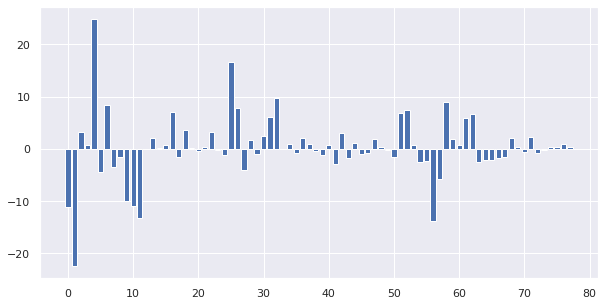

In [74]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
print("koeficijenti: ", regression_model_inter.coef_)

Na osnovu grafikona, uočava se prisustvo izraženih vrednosti, zbog kojih sledi postupak regularizacije.

Mean squared error:  2189.5182518475094
Mean absolute error:  34.38869284569425
Root mean squared error:  46.79228838011141
R2 score:  0.3439862683414153
R2 adjusted score:  0.3414390226689059
        y      y_pred
0   132.0  122.446642
1    72.0   98.727494
2    96.0   84.045942
3    67.0   57.929748
4    97.0   62.387226
5    19.0   85.707184
6    76.0   63.611501
7   213.0  162.225789
8    78.0   52.760010
9   125.0   77.909123
10   51.0   54.962502
11  152.0   55.420658
12  109.0  146.178716
13    9.0   55.455805
14   57.0   63.646326
15   26.0   72.162708
16   37.0   83.299118
17  200.0  175.092070
18   94.0   71.585236
19   59.0   88.547207
koeficijenti:  [-1.10600422e+01 -2.44472433e+01  3.08519107e+00  6.83137181e-01
  2.60436955e+01 -5.09991031e+00  8.31705256e+00 -2.91197809e+00
 -1.45824393e+00 -9.99296462e+00 -8.31009824e+00 -4.96528796e+00
  9.00320435e-03  2.02822693e+00  4.95040759e-04  3.43624594e-01
  6.13901207e+00 -1.12424372e+00  2.82526071e+00  1.80382813e-01
 -1.1

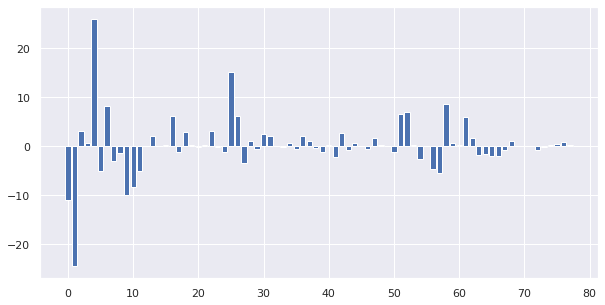

In [75]:
lasso_model = Lasso(alpha=0.08)
lasso_model.fit(x_inter_train, y_train)
y_predicted = lasso_model.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

Mean squared error:  2189.6452586605064
Mean absolute error:  34.343868805259426
Root mean squared error:  46.793645494452626
R2 score:  0.3439482151243345
R2 adjusted score:  0.3414008216944111
        y      y_pred
0   132.0  121.505606
1    72.0   97.248201
2    96.0   83.653278
3    67.0   58.303920
4    97.0   62.165668
5    19.0   84.199772
6    76.0   64.560313
7   213.0  161.729568
8    78.0   53.873542
9   125.0   78.623331
10   51.0   56.446491
11  152.0   56.071536
12  109.0  148.960666
13    9.0   56.225712
14   57.0   63.512758
15   26.0   72.186692
16   37.0   82.348263
17  200.0  177.485932
18   94.0   69.996576
19   59.0   87.987873


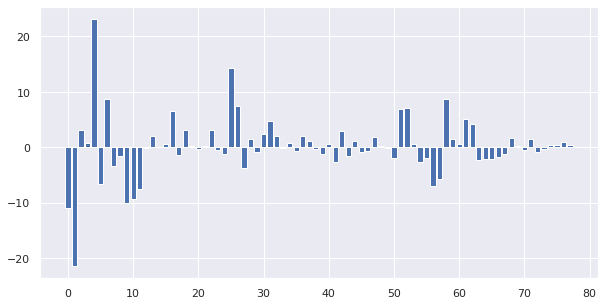

koeficijenti:  [-10.96841125 -21.38166991   3.17519944   0.78322483  23.15275937
  -6.6319666    8.70603473  -3.3620656   -1.59725541 -10.00999589
  -9.32301954  -7.4714733   -0.04812577   2.08812063   0.11073656
   0.55695395   6.45830063  -1.33471843   3.13504288   0.18347636
  -0.33708504   0.2888213    3.19961455  -0.45101197  -1.21346234
  14.27974108   7.44599372  -3.7750088    1.55697926  -0.88493503
   2.45004807   4.82704452   1.97266522  -0.14713308   0.74183209
  -0.69861042   2.06960571   1.10358412  -0.37272489  -1.1688483
   0.59000835  -2.60037837   2.90180362  -1.56344055   1.06435463
  -0.78680815  -0.72921777   1.77431097   0.24726261  -0.14623804
  -1.92802705   6.88117371   7.07547626   0.65723922  -2.55869883
  -1.92213772  -6.9719487   -5.79800276   8.64870618   1.56207012
   0.55726802   5.16568355   4.26615466  -2.3657608   -2.06602272
  -2.11457418  -1.65702897  -1.18581924   1.76833507   0.23127694
  -0.50603094   1.44367125  -0.8000721   -0.32886467   0.44101

In [76]:
ridge_model = Ridge(alpha=200)

ridge_model.fit(x_inter_train, y_train)

y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Mean squared error:  1814.2605695391503
Mean absolute error:  31.27882315463265
Root mean squared error:  42.59413773677254
R2 score:  0.45641930802808484
R2 adjusted score:  0.4539824549558855
        y      y_pred
0   132.0  119.740011
1    72.0  101.271813
2    96.0  101.173650
3    67.0   67.782807
4    97.0   65.947691
5    19.0   62.814269
6    76.0   68.535403
7   213.0  206.235185
8    78.0   57.160738
9   125.0   84.823528
10   51.0   58.394900
11  152.0   81.454662
12  109.0  120.066549
13    9.0   54.449729
14   57.0   52.357278
15   26.0   69.756607
16   37.0   65.527201
17  200.0  168.142199
18   94.0   84.119283
19   59.0   81.203703
Coefficients:  [-1.26881437e+01 -1.58106687e+00  1.95132202e+00 -5.28363732e-01
 -4.78216512e-01  4.16879697e+01 -2.39382520e+00 -1.17223332e+00
 -3.01877281e+00 -1.25611848e+01 -9.16864701e+00  3.64223399e+00
 -3.63334594e+00 -7.28904887e-01  1.45040347e+00 -5.49721088e-01
 -1.11720382e+00  6.45956283e+00 -3.11639150e+00  2.93000761e+00
 -6.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


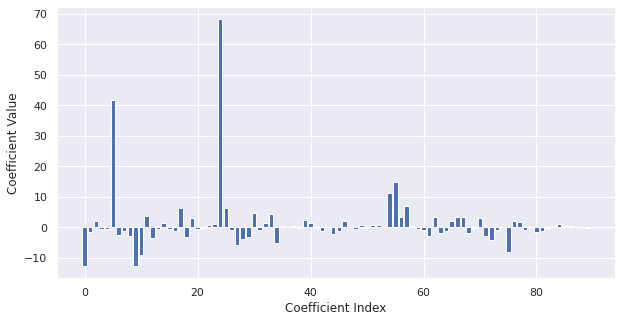

In [77]:
poly = PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
print("Coefficients: ", regression_model_inter.coef_)
print(poly.get_feature_names())

Mean squared error:  1844.8303771143162
Mean absolute error:  31.43847020033931
Root mean squared error:  42.95148864840794
R2 score:  0.4472601180891347
R2 adjusted score:  0.444782204691447
        y      y_pred
0   132.0  120.505071
1    72.0   98.887431
2    96.0   95.371415
3    67.0   65.484300
4    97.0   65.086148
5    19.0   66.090956
6    76.0   66.419874
7   213.0  195.376464
8    78.0   58.846562
9   125.0   86.648903
10   51.0   56.316163
11  152.0   76.042204
12  109.0  126.235721
13    9.0   57.154657
14   57.0   53.683336
15   26.0   71.698806
16   37.0   70.868208
17  200.0  172.855688
18   94.0   79.650468
19   59.0   82.429157


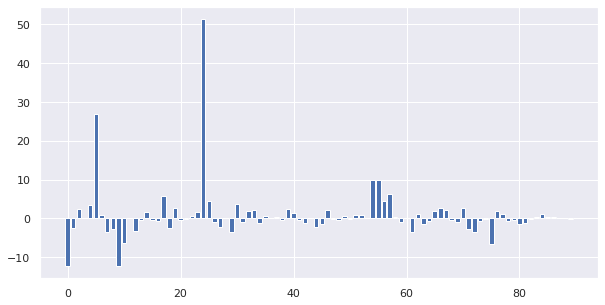

koeficijenti:  [-1.22001818e+01 -2.55497870e+00  2.32109197e+00 -9.42065572e-03
  3.49080849e+00  2.67813289e+01  9.20047115e-01 -3.52135859e+00
 -2.82731764e+00 -1.22968190e+01 -6.41385507e+00  7.64980734e-02
 -3.32889091e+00 -5.45477383e-01  1.52985881e+00 -3.99809998e-01
 -7.45485127e-01  5.84857350e+00 -2.56622159e+00  2.64906303e+00
 -5.12027837e-01 -1.54807510e-01  5.95846230e-01  1.65514721e+00
  5.14393523e+01  4.51272400e+00 -9.64445336e-01 -2.24425371e+00
  3.76091719e-02 -3.45589361e+00  3.73850118e+00 -8.87824281e-01
  1.84070193e+00  2.08991754e+00 -1.19849209e+00  5.90300992e-01
  1.15794751e-01  3.64727740e-01 -5.20987576e-01  2.44839342e+00
  1.35548944e+00 -3.61537879e-01 -1.27581187e+00  9.14719550e-02
 -2.22320989e+00 -1.48867671e+00  2.17211000e+00 -6.45081839e-02
 -4.64846708e-01  4.95800369e-01 -3.00557414e-01  8.88977822e-01
  7.67919907e-01 -1.48567189e-02  9.85088648e+00  9.77440173e+00
  4.46276201e+00  6.20642769e+00  4.00794831e-01 -9.96798970e-01
 -3.168900

In [78]:
ridge_model = Ridge(alpha=300)

ridge_model.fit(x_inter_train, y_train)

y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

Mean squared error:  1816.3281287732464
Mean absolute error:  31.26925566146741
Root mean squared error:  42.61840129302419
R2 score:  0.4557998351155207
R2 adjusted score:  0.4533602049681007
        y      y_pred
0   132.0  120.185698
1    72.0  101.915822
2    96.0   99.385269
3    67.0   68.093928
4    97.0   65.503260
5    19.0   64.301837
6    76.0   68.032476
7   213.0  204.171851
8    78.0   57.106848
9   125.0   84.167652
10   51.0   58.019363
11  152.0   80.549635
12  109.0  120.408001
13    9.0   54.625184
14   57.0   53.669586
15   26.0   69.751540
16   37.0   65.874764
17  200.0  169.094678
18   94.0   83.198928
19   59.0   82.795327
koeficijenti:  [-1.26195196e+01 -1.75573782e+00  1.95191272e+00 -4.34615009e-01
 -2.10832227e-02  4.00656017e+01 -1.96384310e+00 -1.47402032e+00
 -2.90403956e+00 -1.24366746e+01 -6.35088853e+00  0.00000000e+00
 -3.54287041e+00 -5.73798352e-01  1.35284768e+00 -4.46514295e-01
 -1.01127033e+00  5.88111009e+00 -2.77167333e+00  2.32953254e+00
 -5.1

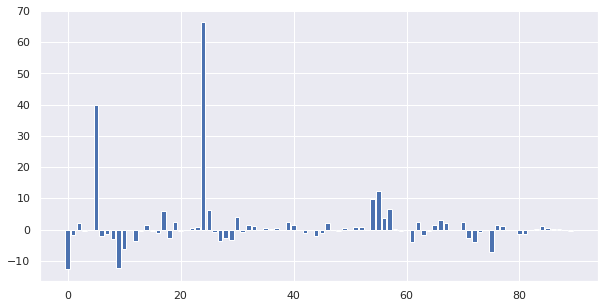

In [79]:
lasso_model = Lasso(alpha=0.05)
lasso_model.fit(x_inter_train, y_train)
y_predicted = lasso_model.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Mean squared error:  1724.8692994348548
Mean absolute error:  28.677344634760765
Root mean squared error:  41.531545834881406
R2 score:  0.48320232325499035
R2 adjusted score:  0.47129961702314005
        y      y_pred
0   132.0  127.039141
1    72.0  103.149570
2    96.0  135.176107
3    67.0   53.543302
4    97.0   55.416038
5    19.0   59.546695
6    76.0   67.374146
7   213.0  229.594464
8    78.0   59.008884
9   125.0   85.250424
10   51.0   69.212377
11  152.0   96.790777
12  109.0  102.242582
13    9.0   43.697840
14   57.0   51.306226
15   26.0   60.117665
16   37.0   67.746236
17  200.0  177.821975
18   94.0   86.462166
19   59.0   44.645880
Coefficients:  [ 7.35869066e+00 -4.71519731e+01 -2.24712023e+01  6.71467447e-01
  5.46173819e+00 -7.93635715e+00  8.09340265e+00 -1.48139057e+01
 -3.07009996e+00 -8.57461161e+00 -1.65837065e+01  2.17771095e+01
 -1.26268890e+00 -5.93585015e+00 -7.79755935e-01  9.31607037e-01
  5.71531336e+00 -4.60510289e+00  2.71339306e-01  6.48005381e+00
 

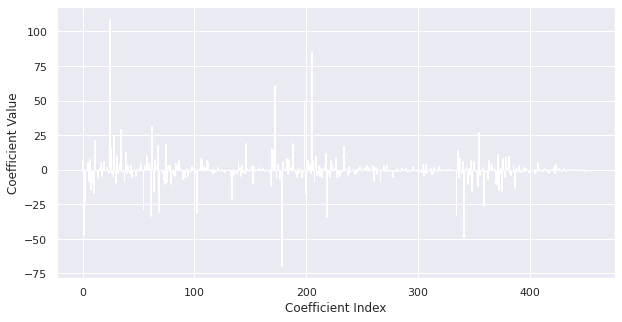

In [80]:
poly = PolynomialFeatures(degree=3,interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
print("Coefficients: ", regression_model_inter.coef_)

Nakon izvedenih izmena na modelu, vidljiv je napredak gde je sad:

- MAE ~ 28.68
- R2 adjusted score ~ 0.48, što ukazuje na to da model objašnjava 48% varijanse u ciljnoj promenljivoj, odnosno, model je u stanju da uzme u obzir 48% varijanse u ciljnoj promenljivoj korišćenjem prediktorskih varijabli. Preostala varijansa koja nije ojašnjena modelom je posledica faktora koji nisu prediktori u modelu ili su slučajne greške.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.457e+07, tolerance: 6.612e+03
  model = cd_fast.enet_coordinate_descent(


Mean squared error:  1557.5182393276218
Mean absolute error:  28.516185677025398
Root mean squared error:  39.465405601965145
R2 score:  0.533343304425314
R2 adjusted score:  0.5225954280154668
        y      y_pred
0   132.0  128.725478
1    72.0  102.985565
2    96.0  137.235203
3    67.0   55.768523
4    97.0   58.911284
5    19.0   57.153298
6    76.0   65.835593
7   213.0  226.900016
8    78.0   58.301069
9   125.0   82.772788
10   51.0   69.684182
11  152.0   94.928981
12  109.0  104.571765
13    9.0   41.467617
14   57.0   52.056879
15   26.0   61.457862
16   37.0   70.212871
17  200.0  177.286839
18   94.0   87.326163
19   59.0   44.564355
koeficijenti:  [ 5.98062019e+00 -2.14014117e+01 -2.16417728e+01 -4.25783346e-01
 -5.44995455e-01  1.14425978e+01  6.08999743e-01 -1.26344277e+01
 -2.62314579e+00 -8.62323661e+00 -2.97042000e+00  6.30200595e+00
 -1.16807348e+00 -6.36769849e+00 -9.15126548e-01  8.03110727e-01
  5.48132491e+00 -5.77576938e+00  1.32058062e+00  6.15813596e+00
 -1.

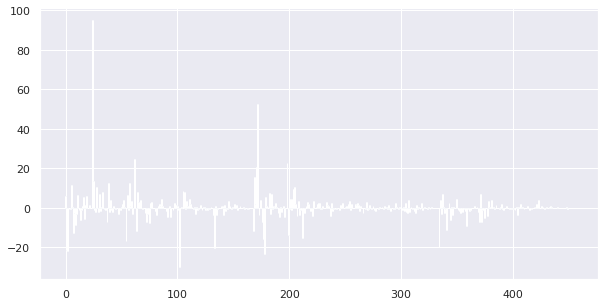

In [81]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(x_inter_train, y_train)
y_predicted = lasso_model.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
print("koeficijenti: ", lasso_model.coef_)

Mean squared error:  1586.7761642435066
Mean absolute error:  28.710811447435503
Root mean squared error:  39.8343590916624
R2 score:  0.524577174940684
R2 adjusted score:  0.5136274000534615
        y      y_pred
0   132.0  131.030547
1    72.0  101.830631
2    96.0  141.868889
3    67.0   58.363369
4    97.0   64.098950
5    19.0   50.152185
6    76.0   65.058498
7   213.0  220.564651
8    78.0   57.200518
9   125.0   83.396031
10   51.0   71.558789
11  152.0   92.331543
12  109.0  112.176411
13    9.0   44.902029
14   57.0   51.358686
15   26.0   63.950285
16   37.0   76.082649
17  200.0  179.096848
18   94.0   81.145935
19   59.0   47.200107


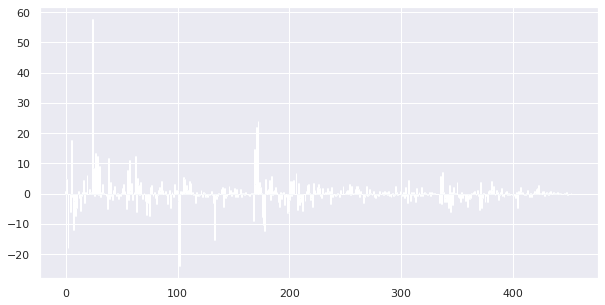

koeficijenti:  [ 7.66585990e-01  4.78011940e+00 -1.79897381e+01 -2.94687582e-01
 -5.99215142e+00  1.75904992e+01 -9.97482740e-01 -1.20182174e+01
 -2.52376329e+00 -7.47471727e+00 -4.88774822e+00  9.57453342e-01
 -1.38659463e+00 -5.87931289e+00 -8.72518237e-01  6.43132645e-01
  4.36907959e+00 -2.98251432e+00  5.86219231e-01  6.01521177e+00
 -4.69118239e-02  1.56335803e+00  6.39300576e-01  2.77132488e-01
  5.77416895e+01  8.57514935e+00 -9.04353103e-01  1.33559649e+01
  1.24201546e+01 -6.47058898e-01  8.96379797e+00 -1.27230959e+00
  6.05276752e-01  3.20363244e+00  1.83008969e-01 -3.00758223e-01
 -8.06333890e-01 -5.13717435e+00  1.17258876e+01 -1.80559383e+00
  3.67119943e+00 -9.30162757e-01 -2.09457873e+00  1.16329934e+00
  2.35278600e+00 -8.69363526e-01  1.88303727e-01 -1.73424179e+00
 -3.04376552e-01 -7.73954403e-01  2.66589936e-01  1.80898594e+00
  3.31183620e+00  9.48754156e-01 -5.18155307e+00  7.67060283e+00
 -2.15324167e+00  1.11989704e+01  6.88452437e-01  3.52190919e+00
 -2.076292

In [82]:
ridge_model = Ridge(alpha=100)

ridge_model.fit(x_inter_train, y_train)

y_predicted = ridge_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(ridge_model.coef_)),ridge_model.coef_)
plt.show()
print("koeficijenti: ", ridge_model.coef_)

Na osnovu grafikona, uočava se veće preklapanje stvarnih i predviđenih vrednosti u odnosu na prethodni grafikon, kada je korišćen drugačiji model.

No, i dalje se više vrednosti "ne pogađaju" kako treba, dok sada postoji i odstupanje kod nižih vrednosti.

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Mean squared error:  472811.3330374394
Mean absolute error:  41.01681700728106
Root mean squared error:  687.6127784134319
R2 score:  -140.66163113490344
R2 adjusted score:  -154.7065707454332
        y      y_pred
0   132.0  113.808472
1    72.0   68.456787
2    96.0  151.982422
3    67.0   50.246277
4    97.0   64.419373
5    19.0   52.075378
6    76.0   64.511963
7   213.0  242.632080
8    78.0   65.665527
9   125.0   96.096924
10   51.0   82.916931
11  152.0   99.591919
12  109.0  103.968994
13    9.0   25.980225
14   57.0   56.062744
15   26.0   51.500244
16   37.0   57.947144
17  200.0  202.748047
18   94.0   79.729431
19   59.0   73.642944
Coefficients:  [-7.66442790e+11 -1.30630924e+10 -3.19274225e+01 ... -2.03234158e-01
  6.50900452e-01 -7.00043310e-02]


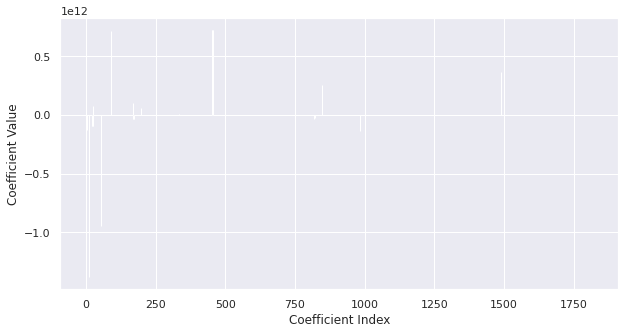

In [83]:
poly = PolynomialFeatures(degree=4,interaction_only=False, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)
regression_model_inter = LinearRegression(fit_intercept=True, normalize=True)
regression_model_inter.fit(x_inter_train, y_train)
y_predicted = regression_model_inter.predict(x_inter_test)
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_inter.coef_)),regression_model_inter.coef_)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
print("Coefficients: ", regression_model_inter.coef_)

3. Odabrati najbolji model linearne regresije i objasniti zašto je baš taj model odabran.


Nakon provere modela 4. stepena, model 3. stepena bira kao konačan jer daje najbolje rezultate, odnosno, MAE je "pala" na ~ 28.68, sa prethodnih 31.27,  dok model objašnjava oko 48% varijanse u ciljnoj promenljivoj, što je bolje u odnosu na prethodno dobijenih 46%.



#**III DEO: KNN KLASIFIKATOR**

*Napraviti klasifikator koji koristi kNN metodu za klasifikaciju uzoraka u jednu od 3 grupe zagađenja.*

1. Prvo je potrebno uzorcima iz date baze dodeliti labele: bezbedno, nebezbedno ili opasno. 
Uzorcima čija je vrednost koncentracije PM2.5 čestica do 55.4 µg/m3 dodeliti labelu bezbedno, 
onima čija je vrednost koncentracije PM2.5 čestica od 55.5 µg/m3 do 150.4 µg/m3 dodeliti labelu 
nebezbedno, dok onima sa vrednošću preko 150.5 µg/m3 dodeliti labelu opasno

In [84]:
cestice= [
    (df['PM_US Post'] <= 55.4),
    (df['PM_US Post'] >= 55.5) & (df['PM_US Post']<=150.4),
    (df['PM_US Post'] >= 150.5)]
vrednost = [1,2,3]

df['Labela']=np.select(cestice, vrednost)

df['Labela'] = df['Labela'].replace(1, "bezbedno")
df['Labela'] = df['Labela'].replace(2, "nebezbedno")
df['Labela'] = df['Labela'].replace(3, "opasno")


X = df.iloc[:, :-1].copy()
y=df.iloc[:, -1].copy()

y.unique()

array(['bezbedno', 'nebezbedno', 'opasno'], dtype=object)

2. Koristiti 15% uzoraka za testiranje finalnog klasifikatora, a preostalih 85% uzoraka koristiti za 
metodu unakrsne validacije sa 10 podskupova. Ovom metodom odrediti optimalne parametre 
klasifikatora, oslanjajući se na željenu meru uspešnosti. Obratiti pažnju da u svakom od 
podskupova za unakrsnu validaciju, kao i u test skupu, bude dovoljan broj uzoraka svake klase.


3. Za konačno odabrane parametre prikazati i analizirati matricu konfuzije dobijenu akumulacijom 
matrica iz svake od 10 iteracija unakrsne validacije. Odrediti prosečnu tačnost klasifikatora, kao i 
tačnost za svaku klasu.

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10, stratify=y)

4. Klasifikator sa konačno odabranim parametrima obučiti na celokupnom trening skupu, pa testirati 
na izdvojenom test skupu. Na osnovu dobijene matrice konfuzije izračunati mere uspešnosti
klasifikatora, kao i mere uspešnosti za svaku klasu (tačnost, osetljivost, specifičnost, preciznost, Fmera).


In [86]:
X_train.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
count,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000,24488.000000
mean,2013.755145,7.011557,15.712880,11.523113,2.596210,83.563541,12.776993,72.760535,1014.526299,18.349314,-20.974763,4.326976,0.109098,1.858086
std,1.049551,3.429897,8.795927,6.937731,1.051679,57.183275,7.506171,18.207395,8.088628,7.744960,67.942125,6.445067,0.997095,11.233485
min,2012.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-2.000000,-135.000000,0.000000,0.000000,0.000000
25%,2013.000000,4.000000,8.000000,6.000000,2.000000,44.000000,7.000000,60.740000,1008.000000,12.000000,-45.000000,1.000000,0.000000,0.000000
50%,2014.000000,7.000000,16.000000,12.000000,3.000000,69.000000,14.000000,76.350000,1014.900000,19.000000,0.000000,2.000000,0.000000,0.000000
75%,2015.000000,10.000000,23.000000,18.000000,3.000000,105.000000,19.000000,87.750000,1021.000000,24.000000,0.000000,5.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,135.000000,93.000000,51.700000,169.400000


In [87]:
y_test.groupby(by=y_test).count()

Labela
bezbedno      1618
nebezbedno    2196
opasno         508
Name: Labela, dtype: int64

In [88]:
y_train.groupby(by=y_train).count()

Labela
bezbedno       9169
nebezbedno    12444
opasno         2875
Name: Labela, dtype: int64

In [89]:
def evaluation_classif(conf_mat,i):
    sum=0
    TP = conf_mat[i,i]
    
    if i==0:
        FN=conf_mat[i,1:].sum()
        FP=conf_mat[1:,i].sum()
        TN=conf_mat[1:,1:].sum()
    elif i==2:
        FN=conf_mat[i,:-1].sum()
        FP=conf_mat[:-1,i].sum()
        TN=conf_mat[:-1,:-1].sum()
    else:
        FN=conf_mat[i,0:i].sum()+conf_mat[i,i+1:].sum()
        FP=conf_mat[0:i,i].sum()+conf_mat[i+1:,i].sum()
        for k in range(0,3):
            for n in range (0,3):
                if k!=i and n!=i:
                    sum=sum+conf_mat[k,n]
        TN=sum
 
    precision = TP/(TP+FP)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    sensitivity = TP/(TP+FN)
    specificity = TN/(TN+FP)
    F_score = 2*precision*sensitivity/(precision+sensitivity)
    print('Preciznost: ', precision)
    print('Tacnost: ', accuracy)
    print('Osetljivost: ', sensitivity)
    print('Specificnost: ', specificity)
    print('F score: ', F_score)

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV

In [91]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[1,3,5,10,15,17,19], 'metric':('manhattan', 'euclidean','minkowski')}

    
# defining parameter range
grid = GridSearchCV(knn,parameters,cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='recall_micro')
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9814600530562027
{'metric': 'euclidean', 'n_neighbors': 19}


0 )Parametri k= 1 i m= manhattan
Tacnost je:  0.9553658522753052
Osetljivost je: 0.9553658522753052
Matrica konfuzije:


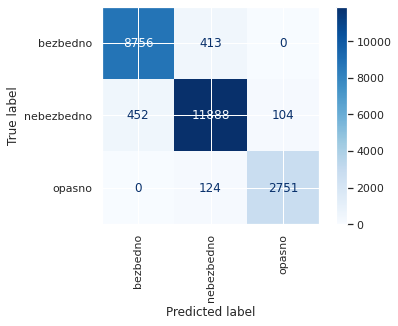

1 )Parametri k= 1 i m= euclidean
Tacnost je:  0.9659017819731677
Osetljivost je: 0.9659017819731677
Matrica konfuzije:


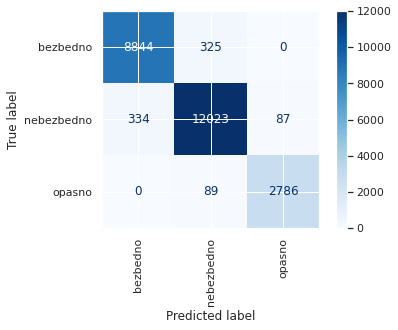

2 )Parametri k= 1 i m= minkowski
Tacnost je:  0.9659017819731677
Osetljivost je: 0.9659017819731677
Matrica konfuzije:


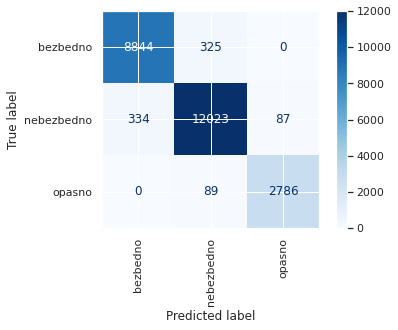

3 )Parametri k= 3 i m= manhattan
Tacnost je:  0.9677798494516903
Osetljivost je: 0.9677798494516903
Matrica konfuzije:


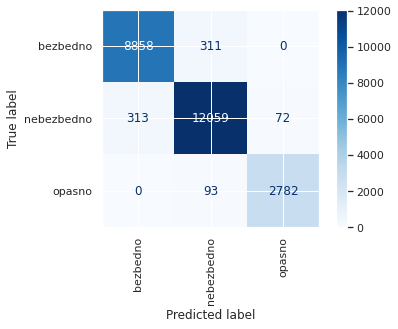

4 )Parametri k= 3 i m= euclidean
Tacnost je:  0.9718227994886535
Osetljivost je: 0.9718227994886535
Matrica konfuzije:


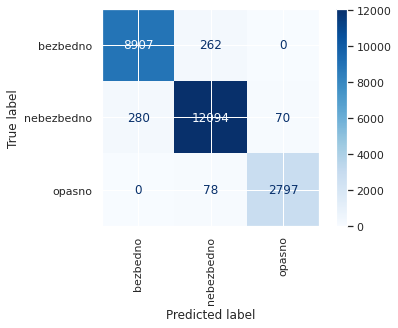

5 )Parametri k= 3 i m= minkowski
Tacnost je:  0.9718227994886535
Osetljivost je: 0.9718227994886535
Matrica konfuzije:


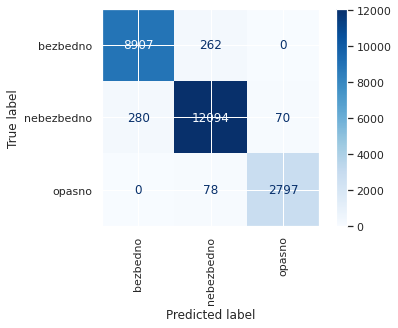

6 )Parametri k= 5 i m= manhattan
Tacnost je:  0.9713736365650112
Osetljivost je: 0.9713736365650112
Matrica konfuzije:


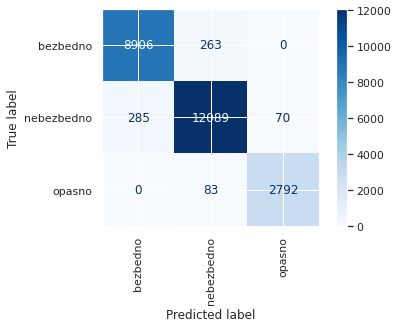

7 )Parametri k= 5 i m= euclidean
Tacnost je:  0.974885507490052
Osetljivost je: 0.974885507490052
Matrica konfuzije:


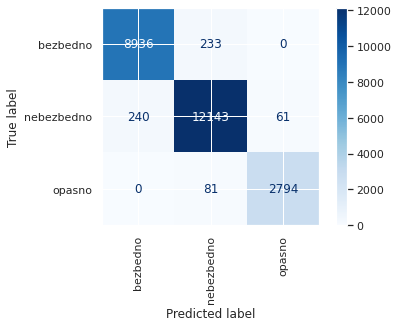

8 )Parametri k= 5 i m= minkowski
Tacnost je:  0.974885507490052
Osetljivost je: 0.974885507490052
Matrica konfuzije:


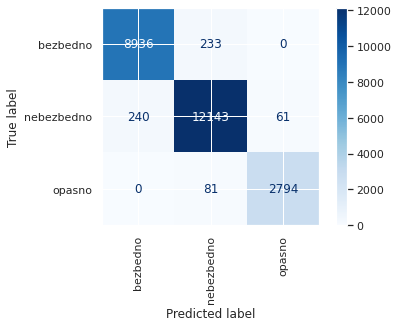

9 )Parametri k= 10 i m= manhattan
Tacnost je:  0.9751715386031915
Osetljivost je: 0.9751715386031915
Matrica konfuzije:


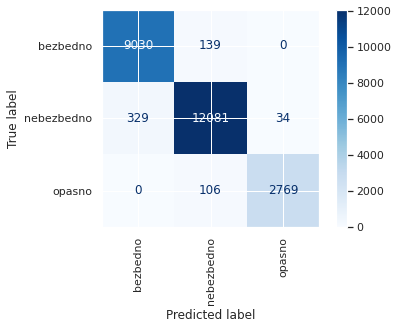

10 )Parametri k= 10 i m= euclidean
Tacnost je:  0.9770091567319726
Osetljivost je: 0.9770091567319726
Matrica konfuzije:


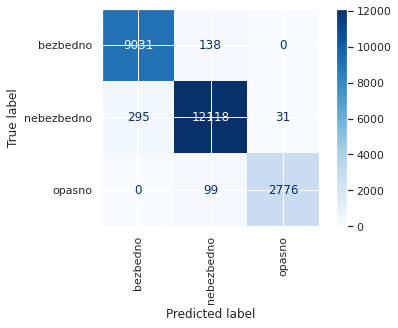

11 )Parametri k= 10 i m= minkowski
Tacnost je:  0.9770091567319726
Osetljivost je: 0.9770091567319726
Matrica konfuzije:


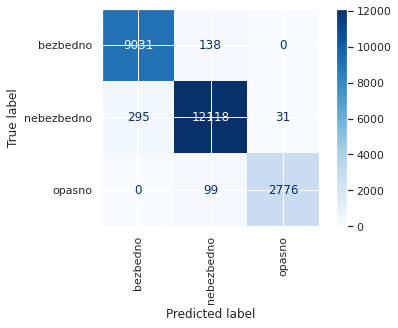

12 )Parametri k= 15 i m= manhattan
Tacnost je:  0.9788466414196003
Osetljivost je: 0.9788466414196003
Matrica konfuzije:


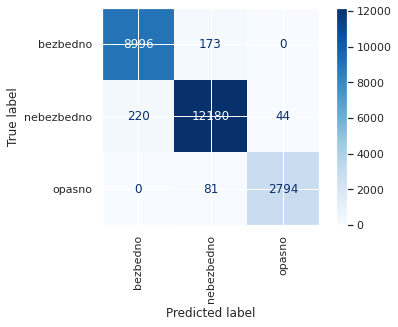

13 )Parametri k= 15 i m= euclidean
Tacnost je:  0.9803167959711446
Osetljivost je: 0.9803167959711446
Matrica konfuzije:


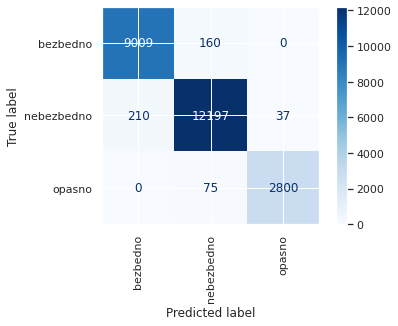

14 )Parametri k= 15 i m= minkowski
Tacnost je:  0.9803167959711446
Osetljivost je: 0.9803167959711446
Matrica konfuzije:


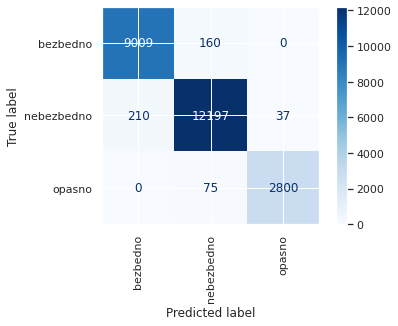

15 )Parametri k= 17 i m= manhattan
Tacnost je:  0.979663434721922
Osetljivost je: 0.979663434721922
Matrica konfuzije:


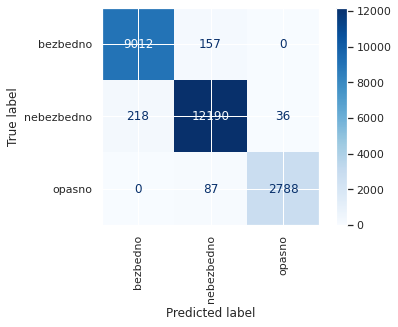

16 )Parametri k= 17 i m= euclidean
Tacnost je:  0.9807249757804305
Osetljivost je: 0.9807249757804305
Matrica konfuzije:


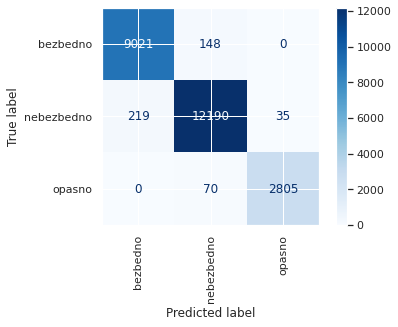

17 )Parametri k= 17 i m= minkowski
Tacnost je:  0.9807249757804305
Osetljivost je: 0.9807249757804305
Matrica konfuzije:


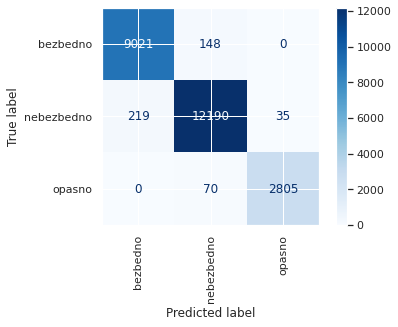

18 )Parametri k= 19 i m= manhattan
Tacnost je:  0.9799900319458124
Osetljivost je: 0.9799900319458124
Matrica konfuzije:


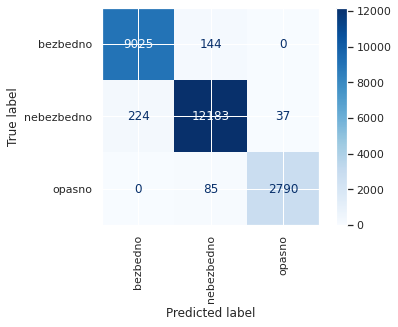

19 )Parametri k= 19 i m= euclidean
Tacnost je:  0.9814600530562027
Osetljivost je: 0.9814600530562027
Matrica konfuzije:


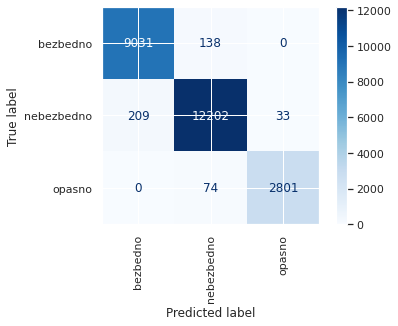

20 )Parametri k= 19 i m= minkowski
Tacnost je:  0.9814600530562027
Osetljivost je: 0.9814600530562027
Matrica konfuzije:


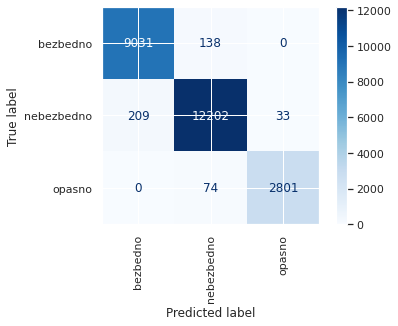

*Najbolja osetljivost je u iteraciji :  19


In [92]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
rec=[]
iter=0
for k in [1,3,5,10,15,17,19]:
# 'manhattan', 'euclidean','minkowski' / 'jaccard', 'dice','matching'
    for m in ['manhattan', 'euclidean','minkowski']:
        indexes = kf.split(X_train, y_train)
        acc_tmp = [] 
        rec_tmp=[]  
        fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        for train_index, test_index in indexes:
            classifier = KNeighborsClassifier(n_neighbors=k, metric=m)
            classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
            y_pred = classifier.predict(X_train.iloc[test_index,:])
            acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
            rec_tmp.append( recall_score(y_train.iloc[test_index], y_pred,average='micro'))
           
            fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
        iter=iter+1
        print(iter-1,')Parametri k=',k, 'i m=',m)
        print('Tacnost je: ', np.mean(acc_tmp))
        print('Osetljivost je:',np.mean(rec_tmp))
        print('Matrica konfuzije:')
        

        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
        plt.show()
        
        acc.append(np.mean(acc_tmp))
        rec.append(np.mean(rec_tmp))
print('*Najbolja osetljivost je u iteraciji : ', np.argmax(rec))

---------------------------------


Nakon urađene unakrsne validacije, dobijeni rezultati pokazuju da je osetljivost najveća za model koji ima sledeće parametre:
- k = 19
- m = euclidean

Njegova mikro osetljivost je : 0.9814600530562027

# Kros validacija sa optimalnim parametrima

Tacnost je:  0.9814600530562027
Osetljivost je: 0.9814600530562027
Matrica konfuzije:


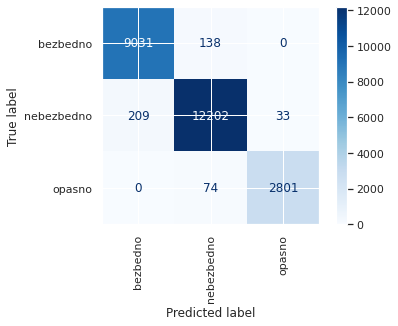

In [93]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
acc = []
indexes = kf.split(X_train, y_train)
acc_tmp = [] 
rec_tmp=[]  
fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
for train_index, test_index in indexes:
    classifier = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
    classifier.fit(X_train.iloc[train_index,:], y_train.iloc[train_index])
    y_pred = classifier.predict(X_train.iloc[test_index,:])
    acc_tmp.append(accuracy_score(y_train.iloc[test_index], y_pred))
    rec_tmp.append( recall_score(y_train.iloc[test_index], y_pred,average='micro'))
    fin_conf_mat += confusion_matrix(y_train.iloc[test_index], y_pred, labels=classifier.classes_)
    
print('Tacnost je: ', np.mean(acc_tmp))
print('Osetljivost je:',np.mean(rec_tmp))
print('Matrica konfuzije:')
        
disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
plt.show()
acc.append(np.mean(acc_tmp))

In [94]:
print('**Prikaz mera za svaku od kategorija:')
print('*Bezbedno:')
evaluation_classif(fin_conf_mat,0)
print('\n *Nebezbedno:')
evaluation_classif(fin_conf_mat,1)
print('\n *Opasno:')
evaluation_classif(fin_conf_mat,2)

**Prikaz mera za svaku od kategorija:
*Bezbedno:
Preciznost:  0.9773809523809524
Tacnost:  0.9858297941849069
Osetljivost:  0.9849492856363835
Specificnost:  0.9863568118023369
F score:  0.9811505242001196

 *Nebezbedno:
Preciznost:  0.9829225068471081
Tacnost:  0.9814603070891865
Osetljivost:  0.9805528768884603
Specificnost:  0.9823978744603122
F score:  0.981736261967978

 *Opasno:
Preciznost:  0.9883556810162315
Tacnost:  0.9956305129042796
Osetljivost:  0.9742608695652174
Specificnost:  0.9984731411650396
F score:  0.9812576633385882


# Obuka finalnog modela nad svim podacima i testiranje nad prethodno izdvojenim test skupom

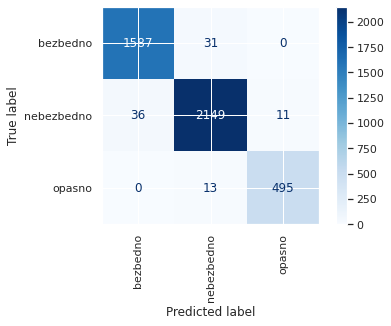

Tačnost:  0.9789449329014345
Preciznost mikro:  0.9789449329014345
Preciznost makro:  0.9786719613500184
Osetljivost mikro:  0.9789449329014345
Osetljivost makro:  0.977949147536386
f mera mikro:  0.9789449329014345
f mera makro:  0.9783083589101377


In [95]:
knn = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

conf_mat = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix =conf_mat,  display_labels=classifier.classes_)
disp.plot(cmap="Blues", values_format='.5g', xticks_rotation=90)  
plt.show()

print('Tačnost: ', accuracy_score(y_test, y_pred))
print('Preciznost mikro: ', precision_score(y_test, y_pred, average='micro'))
print('Preciznost makro: ', precision_score(y_test, y_pred, average='macro'))
print('Osetljivost mikro: ', recall_score(y_test, y_pred, average='micro'))
print('Osetljivost makro: ', recall_score(y_test, y_pred, average='macro'))
print('f mera mikro: ', f1_score(y_test, y_pred, average='micro'))
print('f mera makro: ', f1_score(y_test, y_pred, average='macro'))

In [96]:
print('**Prikaz mera nad konačnim modelom za svaku od kategorija:')
print('*Bezbedno:')
evaluation_classif(conf_mat,0)
print('\n *Nebezbedno:')
evaluation_classif(conf_mat,1)

print('\n *Opasno:')
evaluation_classif(conf_mat,2)

**Prikaz mera nad konačnim modelom za svaku od kategorija:
*Bezbedno:
Preciznost:  0.977818853974122
Tacnost:  0.9844979176307265
Osetljivost:  0.980840543881335
Specificnost:  0.9866863905325444
F score:  0.9793273680962667

 *Nebezbedno:
Preciznost:  0.9799361605107159
Tacnost:  0.9789449329014345
Osetljivost:  0.9785974499089253
Specificnost:  0.9793038570084666
F score:  0.9792663476874003

 *Opasno:
Preciznost:  0.9782608695652174
Tacnost:  0.994447015270708
Osetljivost:  0.9744094488188977
Specificnost:  0.997115888830624
F score:  0.9763313609467457
